In [2]:
import pandas as pd
#ATP
# y2021=pd.read_csv("/content/T_ATP_2021_65.csv")
# yp2=pd.read_csv("/content/T_ATP_past2_65.csv")

y2021=pd.read_csv("/content/T_WTA_2021_65.csv")
yp2=pd.read_csv("/content/T_WTA_past2_65.csv")

# y2021=pd.read_csv("/content/T_ATP_CHQ_2021_65.csv")
# yp2=pd.read_csv("/content/T_CHQ_past2_65.csv")

In [4]:

# A_elo_June15 = pd.read_csv("/content/T_ATP_Elo.csv", encoding= 'unicode_escape')

# W_elo_June15 = pd.read_csv("/content/T_WTA_Elo.csv", encoding= 'unicode_escape')

In [5]:
y2021.columns

Index(['Unnamed: 0', 'tourney_id', 'tourney_name', 'surface', 'draw_size',
       'tourney_level', 'tourney_date', 'match_num', 'winner_id',
       'winner_seed', 'winner_entry', 'winner_name', 'winner_hand',
       'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df',
       'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved',
       'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon',
       'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank',
       'winner_rank_points', 'loser_rank', 'loser_rank_points', 'w_1st_In_prc',
       'l_1st_In_prc', 'w_1stprc', 'l_1stprc', 'w_2ndprc', 'l_2ndprc',
       'w_bpSavedprc', 'l_bpSavedprc', 'w_dr', 'l_dr', 'w1st_retprc',
       'l1st_retprc', 'w2nd_retprc', 'l2nd_retprc', 'nos', 'comeback'],
      dtype='object')

In [6]:
x="Maria Sakkari"
y="Elina Svitolina"
s="Hard"
p1=x.replace(" ", "")
p2=y.replace(" ", "")
# e1=x.replace(" ", "\xa0")
# e2=y.replace(" ", "\xa0")

In [7]:
required=["tourney_name",'round','surface',"tourney_date","winner_name","loser_name","score","nos","comeback","w_dr","l_dr", 'w_1st_In_prc',"w_1stprc","w_2ndprc","w1st_retprc","w2nd_retprc",'w_bpFaced', 'w_bpSavedprc', 'l_1st_In_prc',"l_1stprc","l_2ndprc","l1st_retprc","l2nd_retprc", 'l_bpFaced','l_bpSavedprc','w_ace','l_ace','w_df','l_df']
required_l=["tourney_name",'round','surface',"tourney_date","winner_name","loser_name","score","nos","comeback","w_dr","l_dr",'w_bpFaced', 'w_bpSaved','w_bpSavedprc', 'l_1st_In_prc',"l_1stprc","l_2ndprc","l1st_retprc","l2nd_retprc", 'l_bpFaced','l_bpSaved','l_bpSavedprc','w_ace','l_ace','l_df']
required_w=["tourney_name",'round','surface',"tourney_date","winner_name","loser_name","score","nos","comeback","w_dr","l_dr", 'w_1st_In_prc',"w_1stprc","w_2ndprc","w1st_retprc","w2nd_retprc",'w_bpFaced','w_bpSaved' ,'w_bpSavedprc', 'l_bpFaced','l_bpSaved','l_bpSavedprc','w_ace','l_ace','w_df']
W_describe=["w_dr", 'w_1st_In_prc',"w_1stprc","w_2ndprc","w1st_retprc","w2nd_retprc",'w_bpFaced','w_bpSaved' ,'w_bpSavedprc','w_ace','w_df']
L_describe=["l_dr", 'l_1st_In_prc',"l_1stprc","l_2ndprc","l1st_retprc","l2nd_retprc", 'l_bpFaced','l_bpSaved','l_bpSavedprc','l_ace','l_df']

In [16]:
w=0.4
x_axis=['W/L','mean','min','max']
import matplotlib.pyplot as plt


def Compare_Plot(P1,P_W_2D,P_L_2D,W_describe,L_describe,text,x_axis,w,plt):
  import numpy as np
  for i in range(0,11):
    x=P_W_2D[i]
    y=P_L_2D[i]
    bar1=np.arange(len(x))
    bar2=[i+w for i in bar1]
    for j in range(0,4):
      plt.text(bar1[j]-0.1,x[j]+0.2,x[j].round(decimals=2),fontsize=10)
    for k in range(0,4):
      plt.text(bar2[k]-0.1,y[k]+0.2,y[k].round(decimals=2),fontsize=10)
    
    plt.grid(True, linewidth=0.5, color='#00ff00', linestyle='-')
    plt.bar(bar1,x,w,label=W_describe[i],color='green')
    plt.bar(bar2,y,w,label=L_describe[i],color='red')
    x_axis=x_axis
    plt.xticks(bar1+w/2,x_axis)
    plt.title("{} {} {} W vs L".format(P1,W_describe[i],text))
    plt.show()
    print("\n")
    print("\n")



In [11]:

print("{} 2 SET WINS IN 2021 stats".format(x))
P1_2021_W2=y2021.query('winner_name=="{}" and nos==2 '.format(x))[required_w]

P1_2021_W2=P1_2021_W2.fillna(0)
#A MAtrix of all data
P1_2021_W2_2D=[]
for column in W_describe:

  P1_2021_W2_2D.append(P1_2021_W2[column].describe()[['count','mean','min','max']].to_numpy())
# P1_2021_W2 
# P1_2021_W2_2D
print('P1_2021_W2_2D is PLAYER_1 2 SET WINS in YEAR 2021')

Maria Sakkari 2 SET WINS IN 2021 stats
P1_2021_W2_2D is PLAYER_1 2 SET WINS in YEAR 2021


In [12]:
import numpy as np
def Zero_converter(Np_array):
  Np_withZero=[]
  for i in Np_array:
    i=np.nan_to_num(i)
    Np_withZero.append(i)
  return Np_withZero

In [13]:
P1_2021_W2_2D=Zero_converter(P1_2021_W2_2D)


In [14]:
print("{} 2 SET LOSSES IN 2021 stats".format(x))
P1_2021_L2=y2021.query('loser_name=="{}" and nos==2'.format(x))[required_l]
P1_2021_L2=P1_2021_L2.fillna(0)


P1_2021_L2_2D=[]
for column in L_describe:

  P1_2021_L2_2D.append(P1_2021_L2[column].describe()[['count','mean','min','max']].to_numpy())
  
P1_2021_L2_2D=Zero_converter(P1_2021_L2_2D)
#P1_2021_L2_2D

# P1_2021_L2

Maria Sakkari 2 SET LOSSES IN 2021 stats


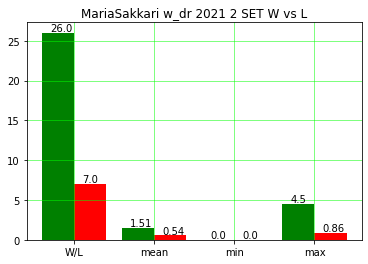

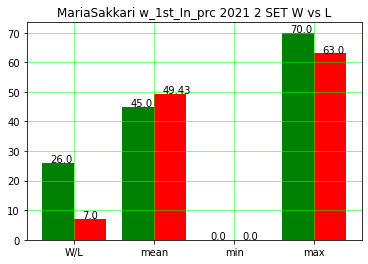

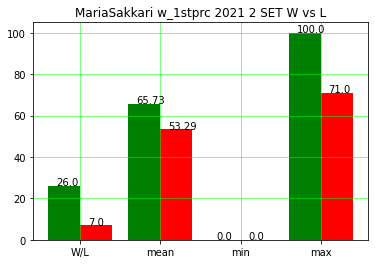

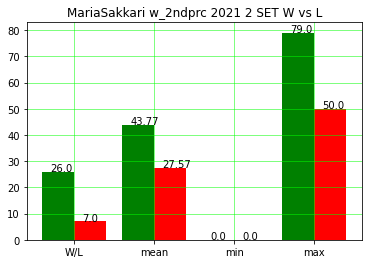

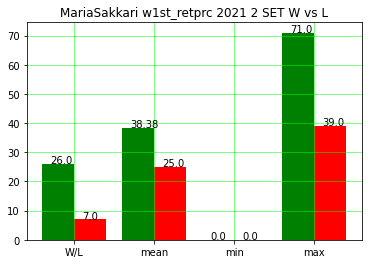

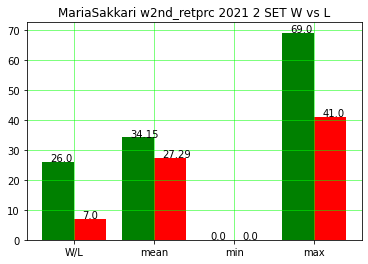

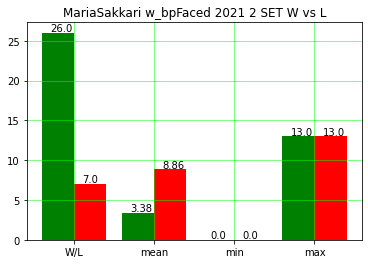

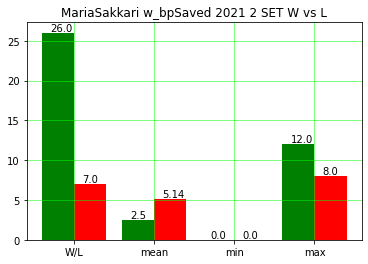

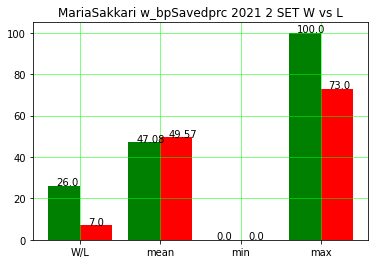

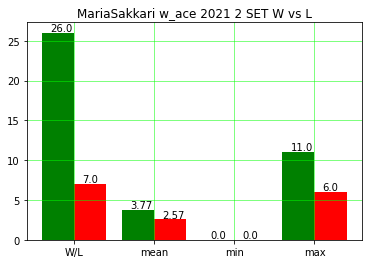

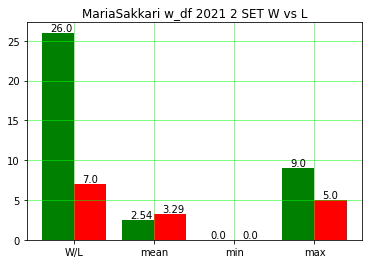

In [18]:
Compare_Plot(p1,P1_2021_W2_2D,P1_2021_L2_2D,W_describe,L_describe,"2021 2 SET",x_axis,w,plt)

In [22]:
serve_winner=["loser_name","w_1st_In_prc","w_1stprc","w_2ndprc","score","surface"]
serve_loser=["winner_name","l_1st_In_prc","l_1stprc","l_2ndprc","score","surface"]
return_winner=["loser_name","w1st_retprc","w2nd_retprc","score","surface"]
return_loser=["winner_name","l1st_retprc","l2nd_retprc","score","surface"]
breaks_winner=["loser_name","w_bpFaced","w_bpSaved","score","surface"]
breaks_loser=["winner_name","l_bpFaced","l_bpSaved","score","surface"]


import numpy as np

def Plot_Serve_stats(Dataframe,p1,text,subs,pl):
  
  w=0.5
  x_axis=Dataframe[subs[0]].tolist()
  # x_axis2=Dataframe[subs[4]].to_list()
  # x_axis3=Dataframe[subs[5]].to_list()



  x=Dataframe[subs[1]].to_numpy()
  y=Dataframe[subs[2]].to_numpy()
  z=Dataframe[subs[3]].to_numpy()

  f = plt.figure()
  width=len(x)*2
  if width==0:
    width=5
  f.set_figwidth(width )

  # f.set_figwidth(len(x)*2)
  f.set_figheight(8)

  bar1=np.arange(len(x))
  bar1= np.array( [i*2 for i in bar1])
  bar2=[i+w for i in bar1]
  bar3=[i+w for i in bar2]
  for a in range(0,len(x)):
    plt.text(bar1[a]-0.2,x[a]+0.2,int(x[a].round()))

  for b in range(0,len(y)):
    plt.text(bar2[b]-0.2,y[b]+0.2,int(y[b].round()))

  for c in range(0,len(z)):
    plt.text(bar3[c]-0.2,z[c]+0.2,int(z[c].round()))

  # for i in range(0,len(x_axis2)):
  #   plt.text(bar1+w,2,x_axis2[i])
  # for a in range(0,len(x)):
  #   plt.text(bar1[a]-w/2,x[a]-x[a]-5,x_axis2[a])
  # for a in range(0,len(x)):
  #   plt.text(bar1[a]-w/2,x[a]-x[a]-7,x_axis3[a])


  plt.grid(True, linewidth=0.5, color='#00ff00', linestyle='-')
  plt.bar(bar1,x,w,color='darkturquoise')
  plt.bar(bar2,y,w,color='darksalmon')
  plt.bar(bar3,z,w,color='coral')




  plt.xticks(bar1+w,x_axis,fontsize=8)




  plt.title("{} {} serve stats".format(p1,text))
  

  plt.show()



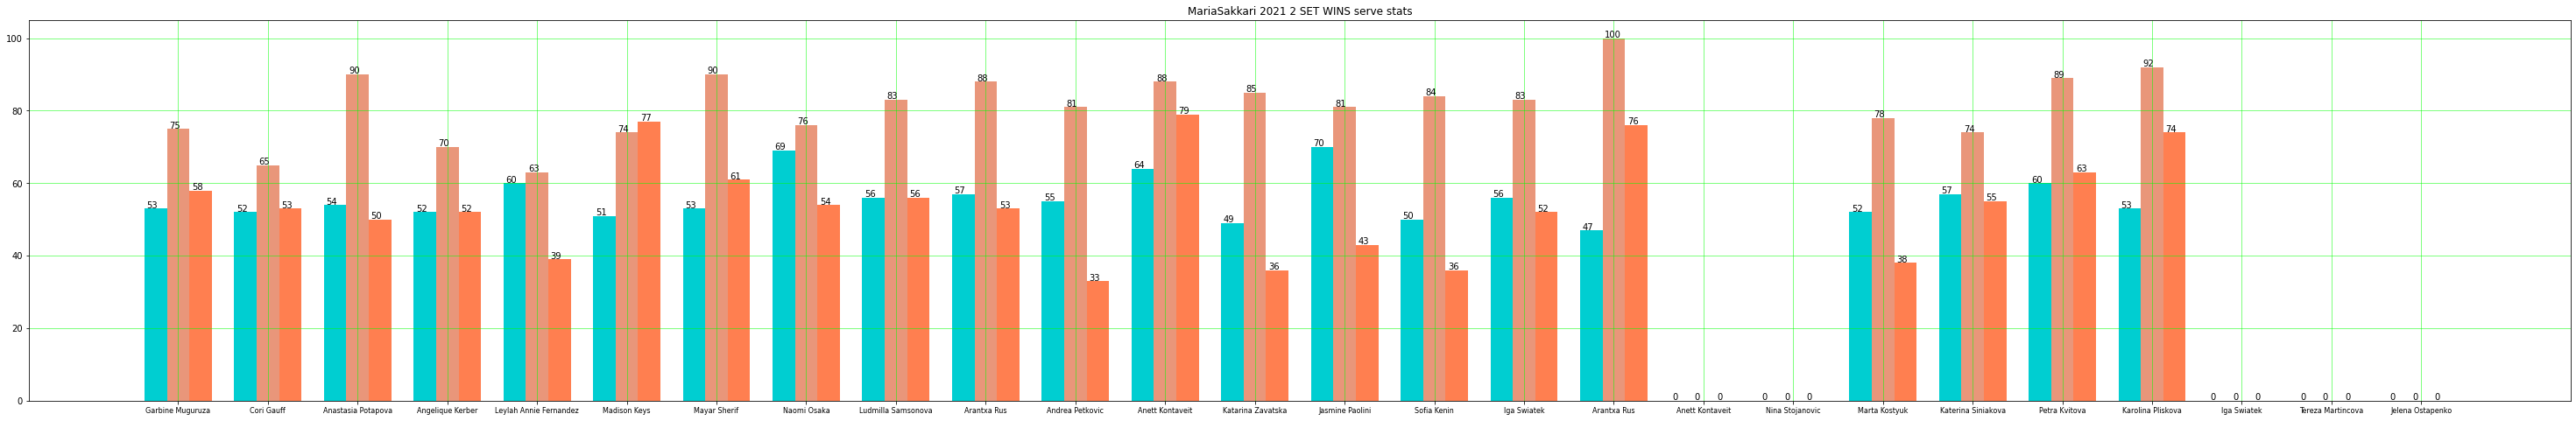

In [23]:
Plot_Serve_stats(P1_2021_W2,p1,"2021 2 SET WINS",serve_winner,plt)

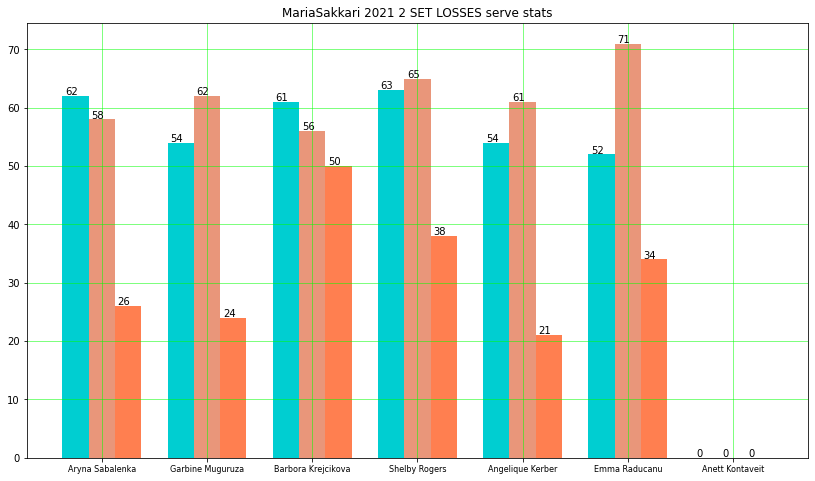

In [25]:



Plot_Serve_stats(P1_2021_L2,p1,"2021 2 SET LOSSES",serve_loser,plt)


In [30]:
def Plot_return_stats(Dataframe,p1,text,subs,plt):

  w=0.5
  x_axis=Dataframe[subs[0]].tolist()
  x_axis2=Dataframe[subs[3]].to_list()
  x_axis3=Dataframe[subs[4]].to_list()



  x=Dataframe[subs[1]].to_numpy()
  y=Dataframe[subs[2]].to_numpy()

  f = plt.figure()
  width=len(x)*2
  if width==0:
    width=5
  f.set_figwidth(width )
  # f.set_figwidth(len(x)*2)
  f.set_figheight(8)

  bar1=np.arange(len(x))
  bar1= np.array( [i*2 for i in bar1])
  bar2=[i+w for i in bar1]

  for a in range(0,len(x)):
    plt.text(bar1[a]-0.2,x[a]+0.2,int(x[a].round()))

  for b in range(0,len(y)):
    plt.text(bar2[b]-0.2,y[b]+0.2,int(y[b].round()))



  plt.grid(True, linewidth=0.5, color='#00ff00', linestyle='-')
  plt.bar(bar1,x,w,color='darkturquoise')
  plt.bar(bar2,y,w,color='darksalmon')


  # for a in range(0,len(x)):
  #   plt.text(bar1[a]-w/2,x[a]-x[a]-4,x_axis2[a])
  # for a in range(0,len(x)):
  #   plt.text(bar1[a]-w/2,x[a]-x[a]-5.5,x_axis3[a])


  plt.xticks(bar1+w,x_axis,fontsize=8)


  plt.title("{} {} return stats".format(p1,text))
  

  plt.show()



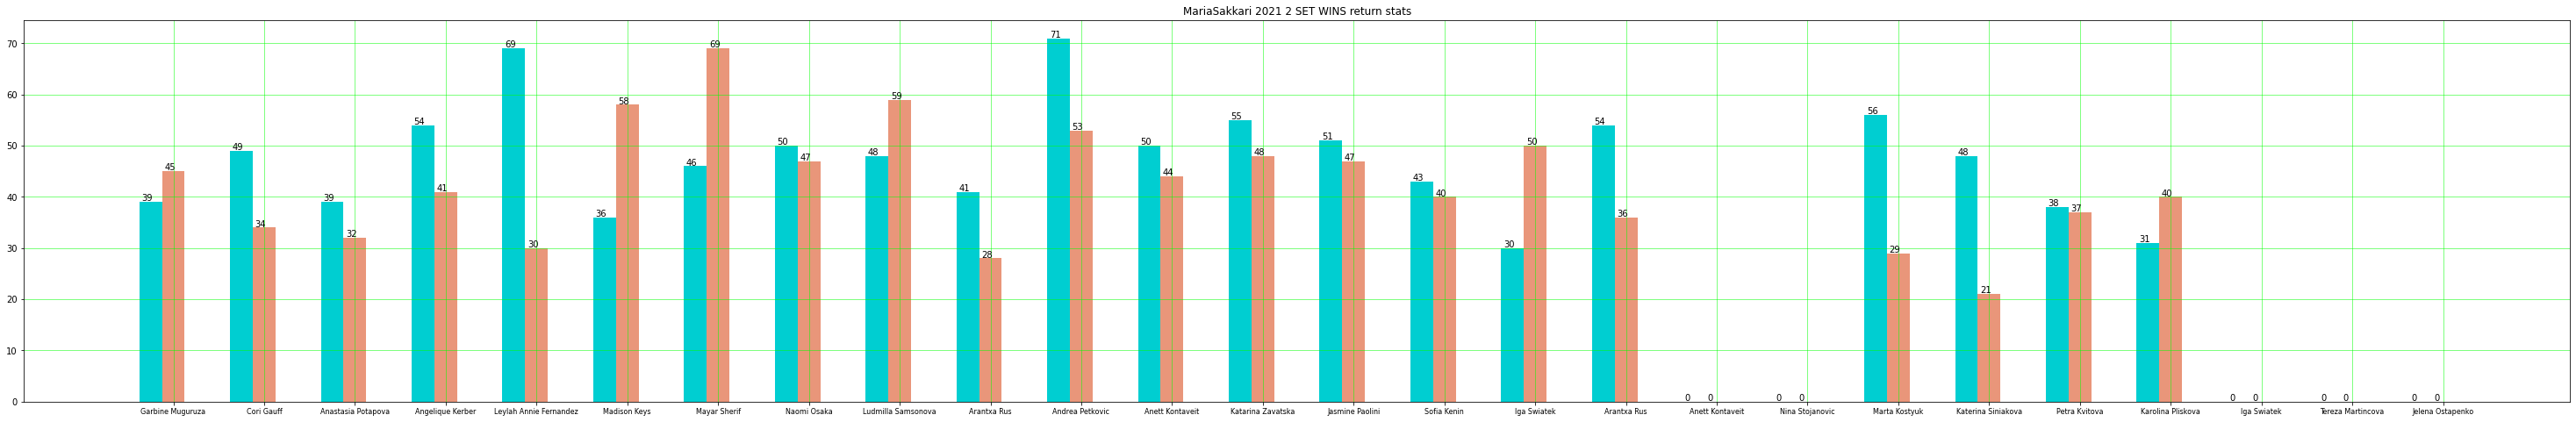

In [31]:
Plot_return_stats(P1_2021_W2,p1,"2021 2 SET WINS",return_winner       ,plt)




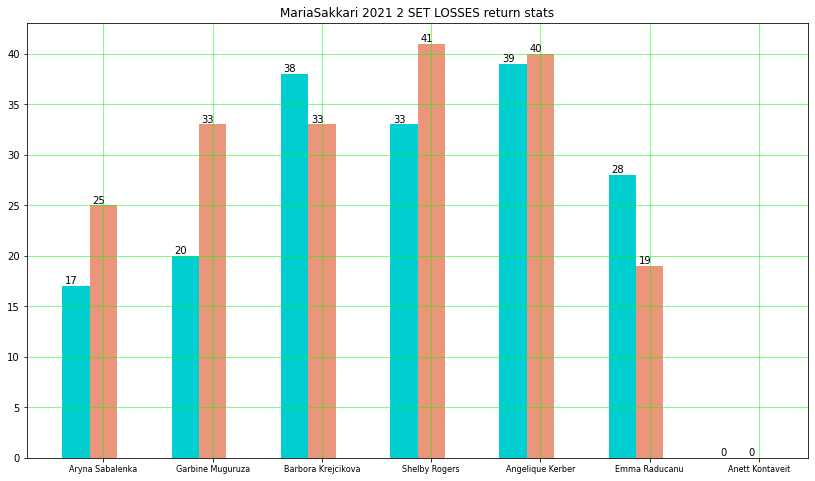

In [33]:
Plot_return_stats(P1_2021_L2,p1,"2021 2 SET LOSSES",return_loser,plt)


In [48]:

def Plot_break_stats(Dataframe,p1,text,subs,plt):
  
  w=0.5
  x_axis=Dataframe[subs[0]].tolist()
  x_axis2=Dataframe[subs[3]].to_list()
  x_axis3=Dataframe[subs[4]].to_list()



  x=Dataframe[subs[1]].to_numpy()
  y=Dataframe[subs[2]].to_numpy()

  f = plt.figure()
  width=len(x)*2
  if width==0:
    width=5
  f.set_figwidth(width )
  f.set_figheight(8)

  bar1=np.arange(len(x))
  bar1= np.array( [i*2 for i in bar1])
  bar2=[i+w for i in bar1]

  for a in range(0,len(x)):
    plt.text(bar1[a]-0.2,x[a]+0.2,int(x[a].round()))

  for b in range(0,len(y)):
    plt.text(bar2[b]-0.2,y[b]+0.2,int(y[b].round()))



  plt.grid(True, linewidth=0.5, color='#00ff00', linestyle='-')
  plt.bar(bar1,x,w,color='darkturquoise')
  plt.bar(bar2,y,w,color='darksalmon')



  # for a in range(0,len(x)):
  #   plt.text(bar1[a]-w/2,-0.75,x_axis2[a])
  # for a in range(0,len(x)):
  #   plt.text(bar1[a]-w/2,-1,x_axis3[a])


  plt.xticks(bar1+w,x_axis,fontsize=8)


  plt.title("{} {} BP stats".format(p1,text))
  

  plt.show()



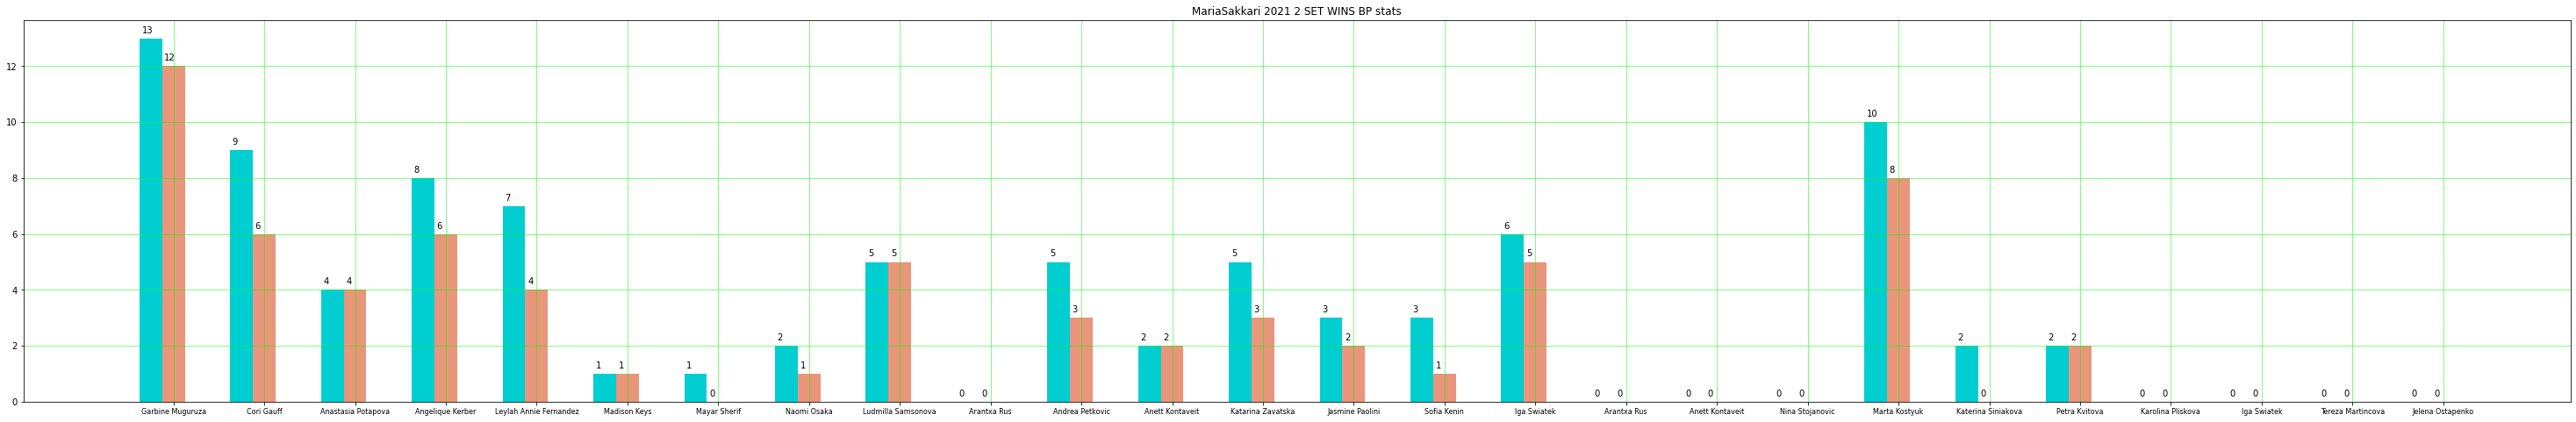

In [49]:
Plot_break_stats(P1_2021_W2,p1,"2021 2 SET WINS",breaks_winner, plt    )

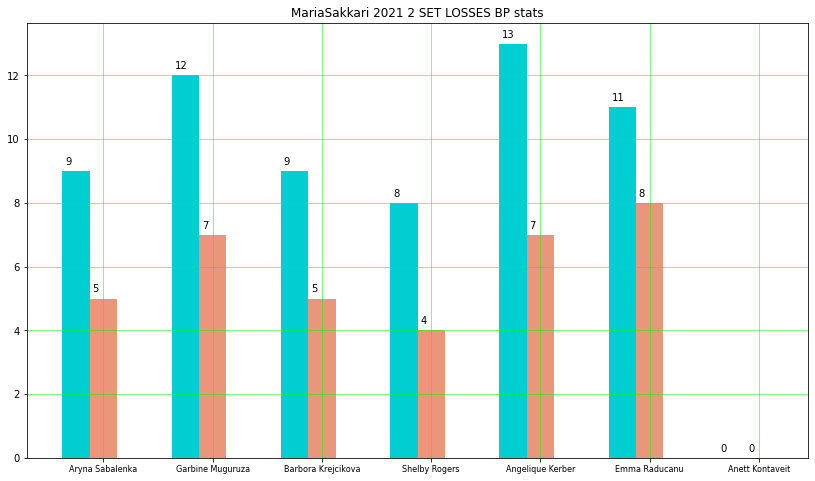

In [51]:
Plot_break_stats(P1_2021_L2,p1,"2021 2 SET LOSSES",breaks_loser, plt)

In [52]:
print("{} 3 SET WINS IN 2021 stats".format(x))
P1_2021_W3=y2021.query('winner_name=="{}" and nos==3'.format(x))[required_w]
P1_2021_W3=P1_2021_W3.fillna(0)

P1_2021_W3_2D=[]
for column in W_describe:

  P1_2021_W3_2D.append(P1_2021_W3[column].describe()[['count','mean','min','max']].to_numpy())

P1_2021_W3_2D=Zero_converter(P1_2021_W3_2D)

# P1_2021_W3

Maria Sakkari 3 SET WINS IN 2021 stats


In [53]:
print("{} 3 SET LOSSES IN 2021 stats".format(x))
P1_2021_L3=y2021.query('loser_name=="{}" and nos==3'.format(x))[required_l]
P1_2021_L3=P1_2021_L3.fillna(0)

P1_2021_L3_2D=[]
for column in L_describe:

  P1_2021_L3_2D.append(P1_2021_L3[column].describe()[['count','mean','min','max']].to_numpy())

P1_2021_L3_2D=Zero_converter(P1_2021_L3_2D)
#P1_2021_L3_2D

# P1_2021_L3

Maria Sakkari 3 SET LOSSES IN 2021 stats


In [54]:
# P1_2021_L3_2D


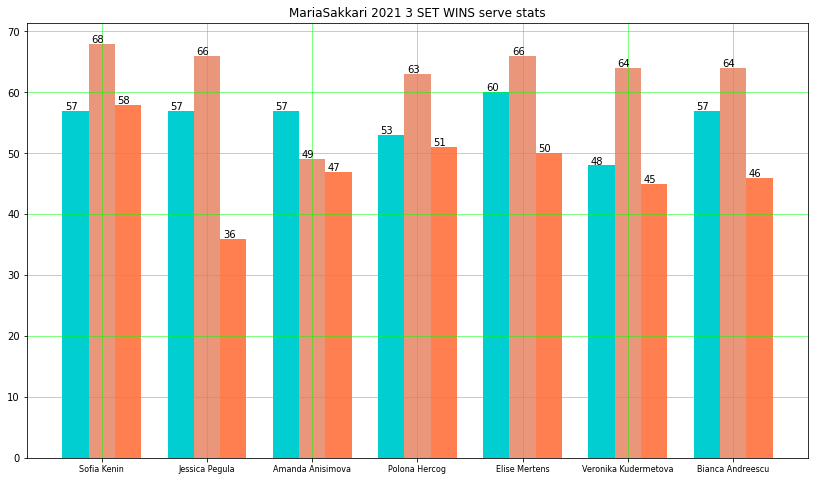

In [55]:
Plot_Serve_stats(P1_2021_W3,p1,"2021 3 SET WINS",serve_winner,plt)

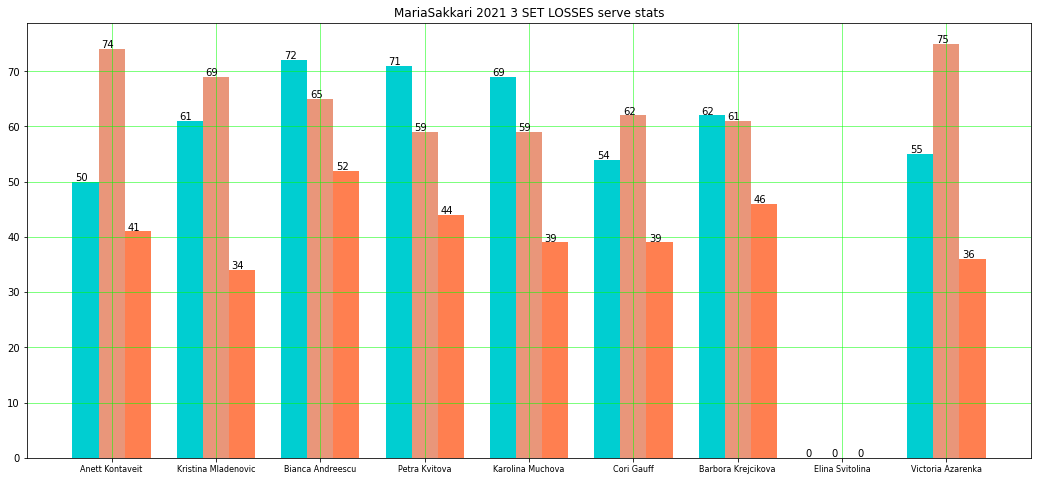

In [57]:
  
Plot_Serve_stats(P1_2021_L3,p1,"2021 3 SET LOSSES",serve_loser,plt    )

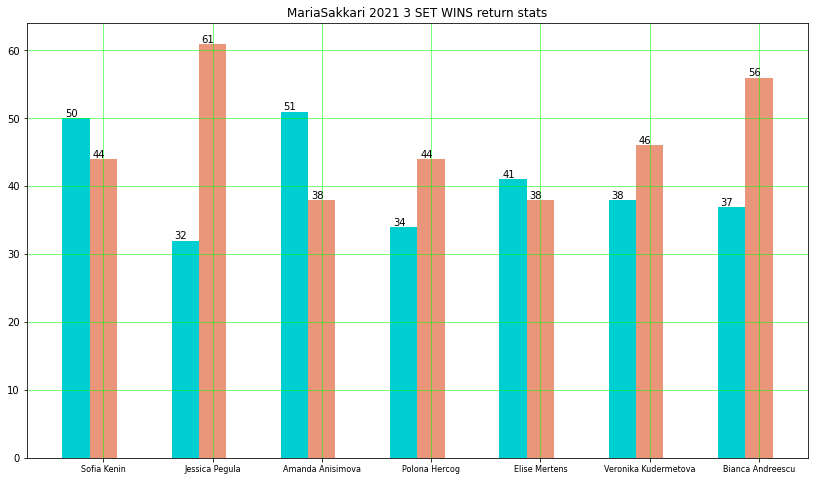

In [58]:
Plot_return_stats(P1_2021_W3,p1,"2021 3 SET WINS",return_winner,plt)




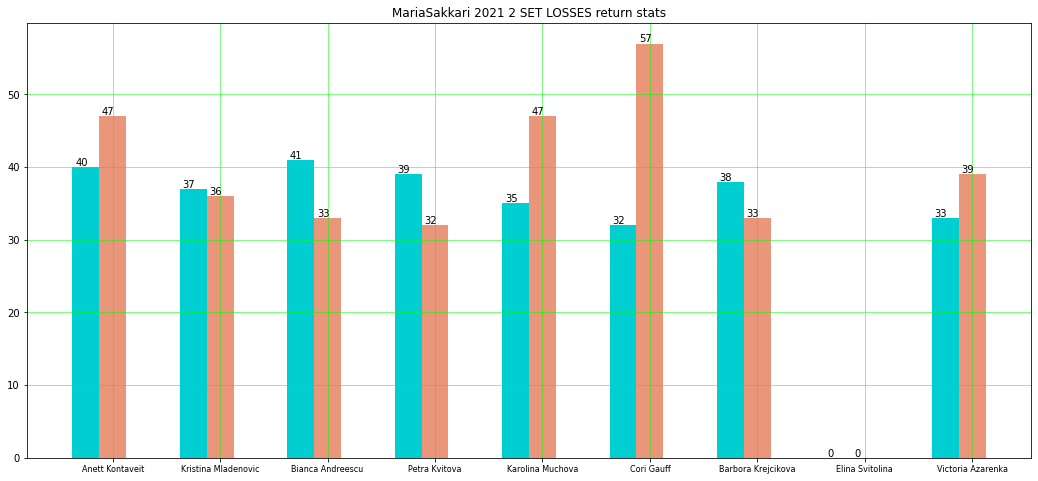

In [59]:
Plot_return_stats(P1_2021_L3,p1,"2021 2 SET LOSSES",return_loser,plt)


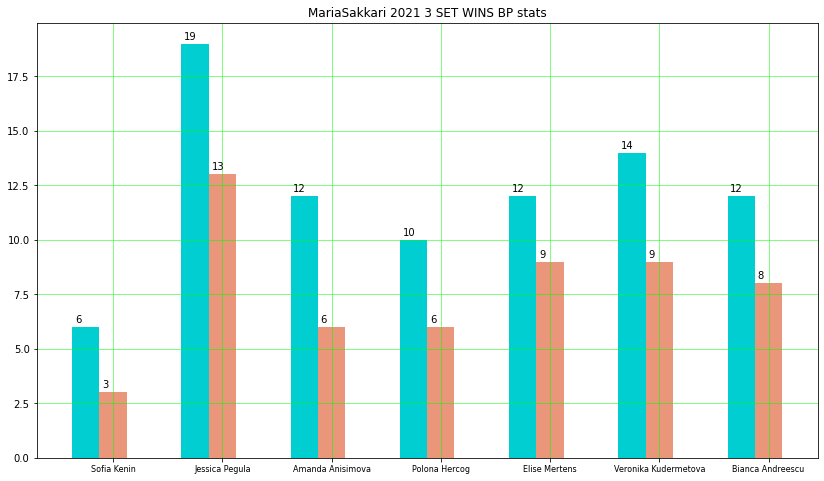

In [60]:
Plot_break_stats(P1_2021_W3,p1,"2021 3 SET WINS",breaks_winner , plt )

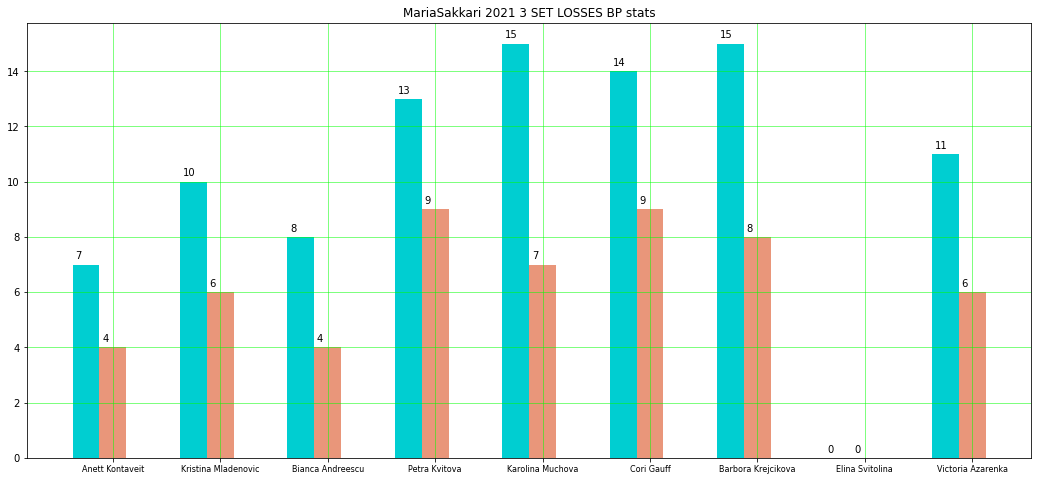

In [62]:
Plot_break_stats(P1_2021_L3,p1,"2021 3 SET LOSSES",breaks_loser, plt    )

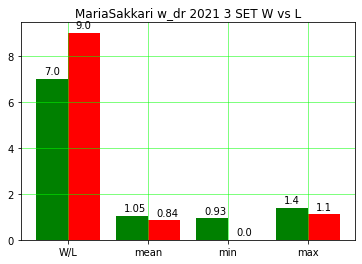

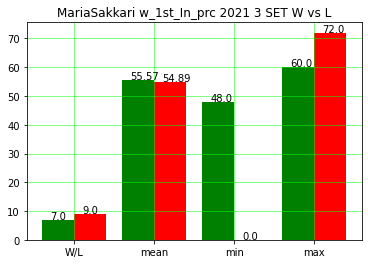

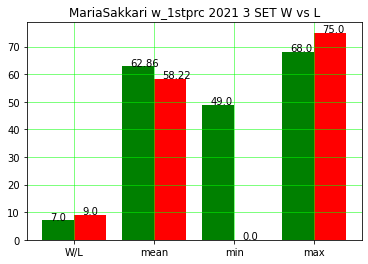

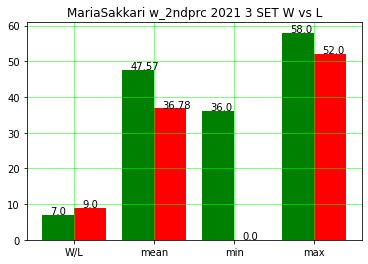

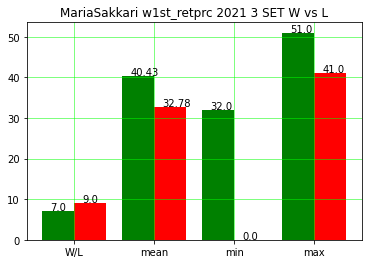

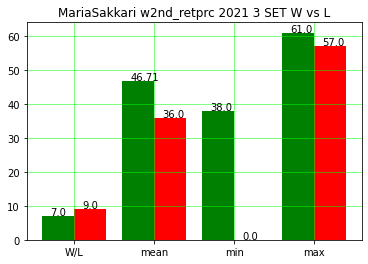

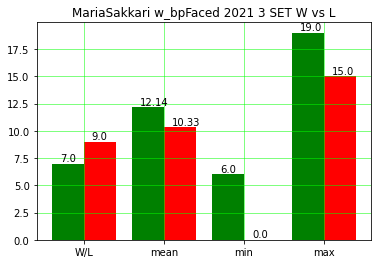

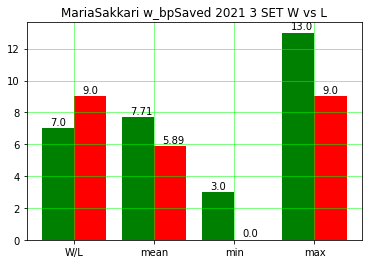

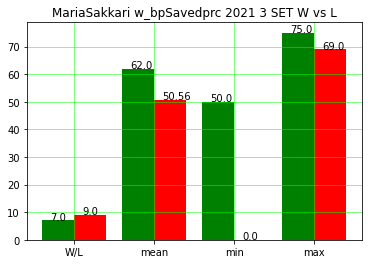

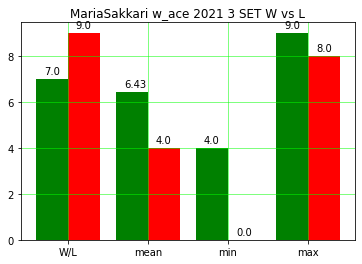

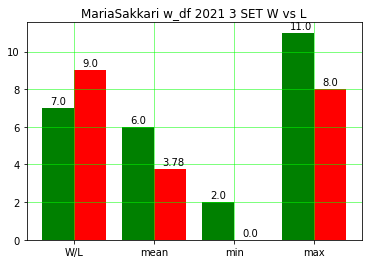

In [63]:
Compare_Plot(p1,P1_2021_W3_2D,P1_2021_L3_2D,W_describe,L_describe,"2021 3 SET",x_axis,w,plt)

In [64]:
print("{} 2 SET WINS IN PAST 2 Years on {} stats".format(x,s))
P1_past2_S_W2=yp2.query('winner_name=="{}" and surface=="{}" and nos==2'.format(x,s))[required_w]
P1_past2_S_W2=P1_past2_S_W2.fillna(0)

P1_past2_S_W2_2D=[]
for column in W_describe:

  P1_past2_S_W2_2D.append(P1_past2_S_W2[column].describe()[['count','mean','min','max']].to_numpy())

P1_past2_S_W2_2D=Zero_converter(P1_past2_S_W2_2D)
# P1_past2_S_W2_2D

# P1_past2_S_W2

Maria Sakkari 2 SET WINS IN PAST 2 Years on Hard stats


In [65]:
print("{} 2 SET LOSSES IN PAST 2 Years on {} stats".format(x,s))
P1_past2_S_L2=yp2.query('loser_name=="{}" and surface=="{}" and nos==2'.format(x,s))[required_l]
P1_past2_S_L2=P1_past2_S_L2.fillna(0)

P1_past2_S_L2_2D=[]
for column in L_describe:

  P1_past2_S_L2_2D.append(P1_past2_S_L2[column].describe()[['count','mean','min','max']].to_numpy()) 

P1_past2_S_L2_2D=Zero_converter(P1_past2_S_L2_2D)
# P1_past2_S_L2_2D

# P1_past2_S_L2

Maria Sakkari 2 SET LOSSES IN PAST 2 Years on Hard stats


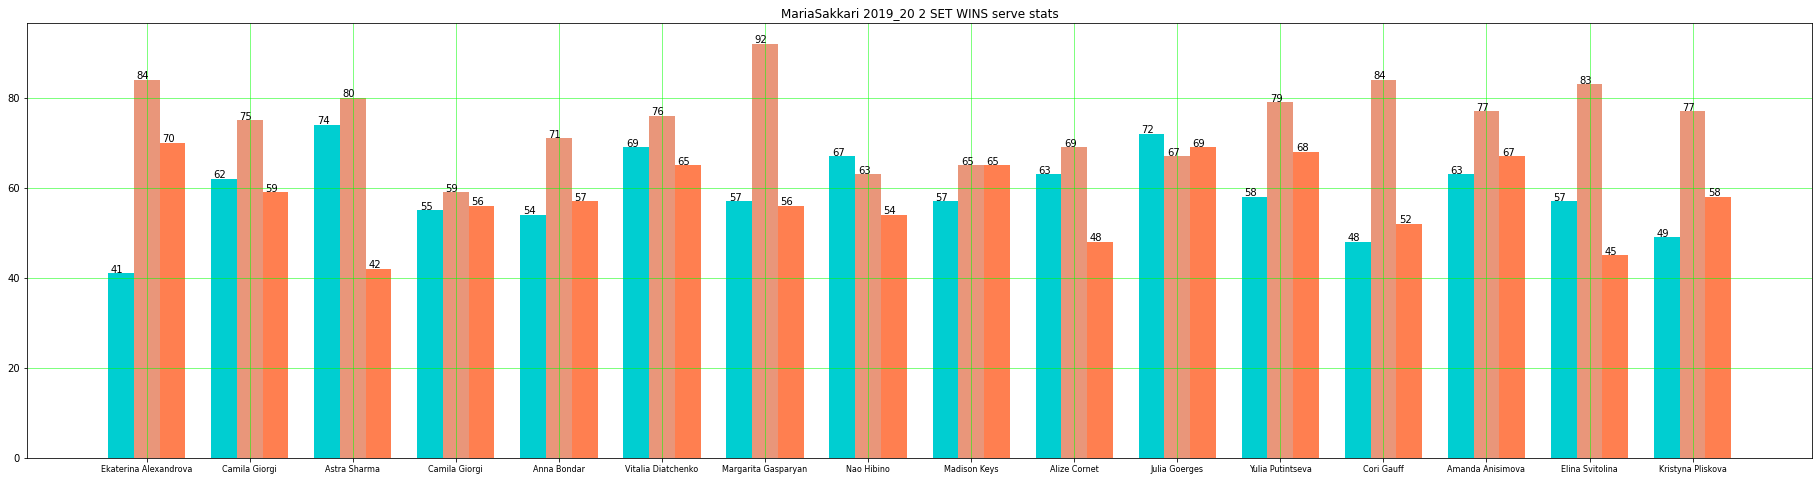

In [67]:
Plot_Serve_stats(P1_past2_S_W2,p1,"2019_20 2 SET WINS",serve_winner,plt )

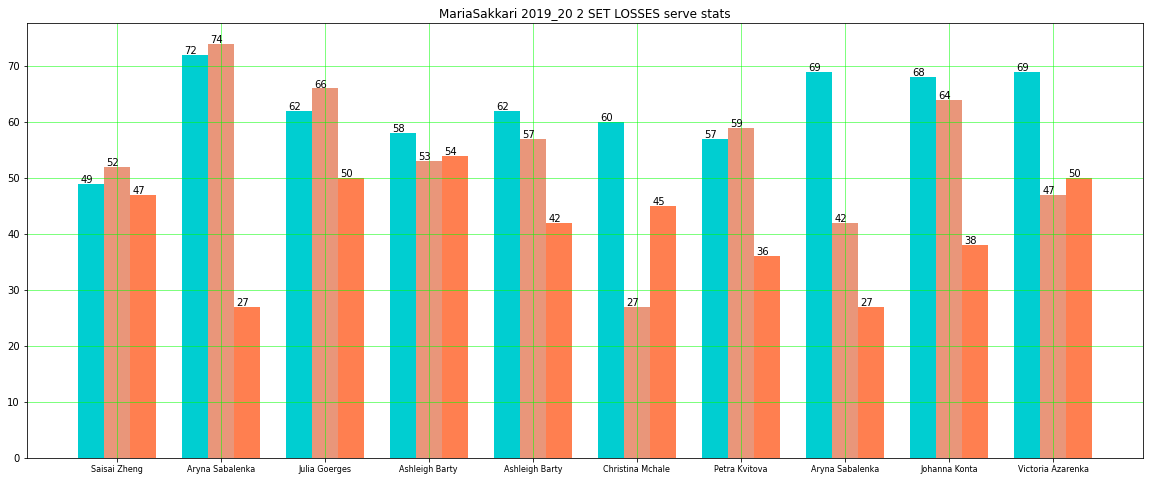

In [68]:

Plot_Serve_stats(P1_past2_S_L2,p1,"2019_20 2 SET LOSSES",serve_loser,plt)

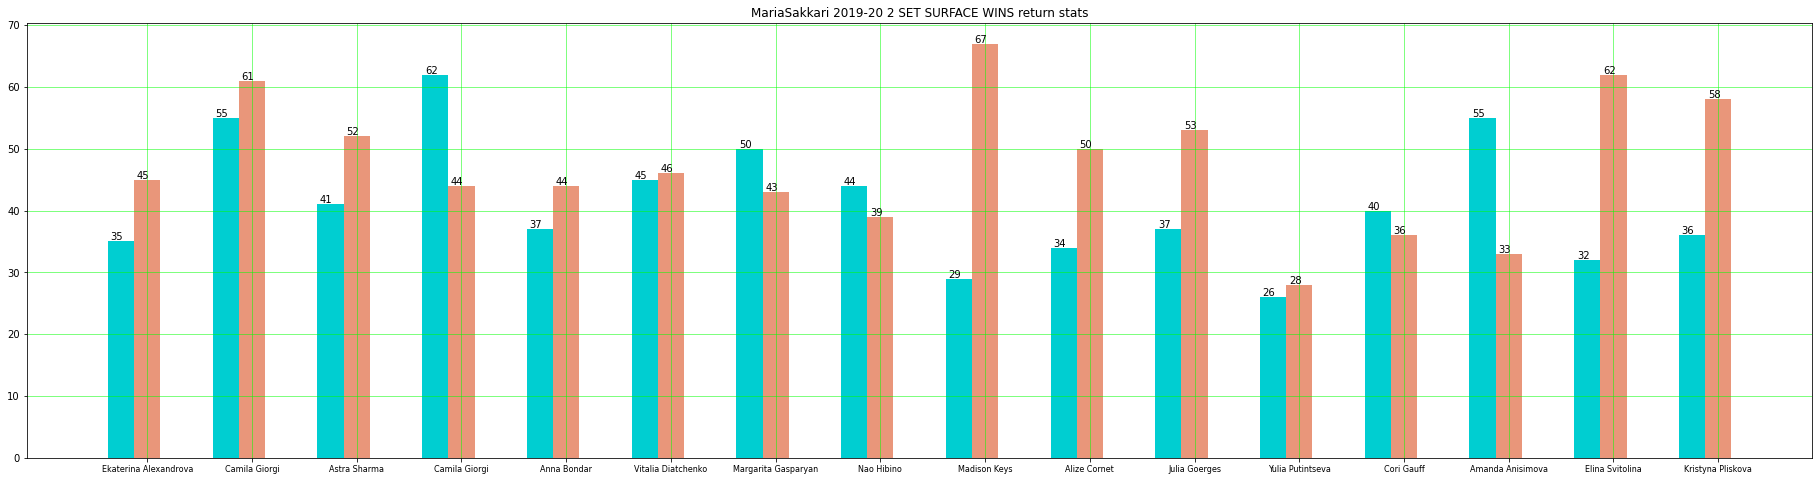

In [69]:
Plot_return_stats(P1_past2_S_W2,p1,"2019-20 2 SET SURFACE WINS",return_winner,plt)




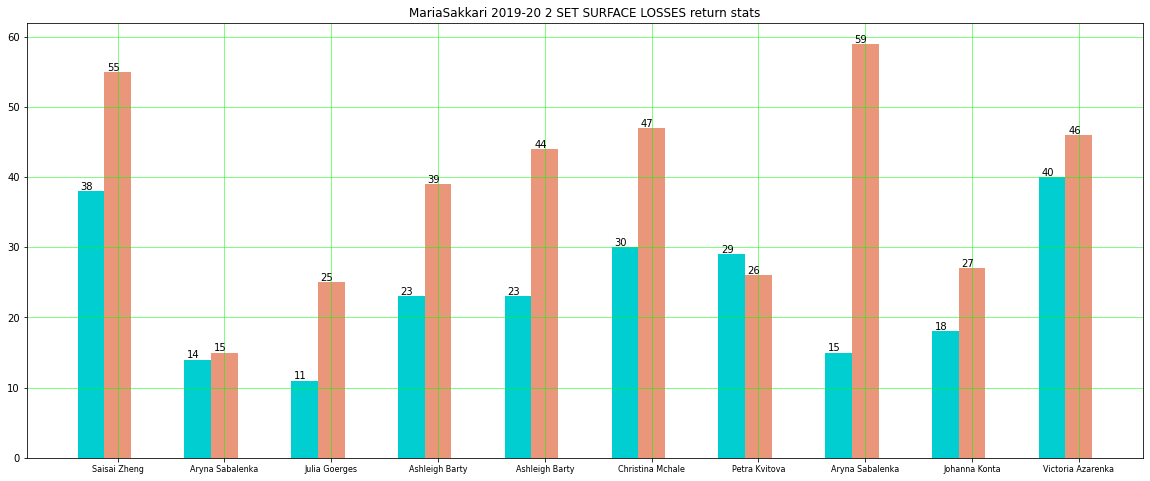

In [70]:
Plot_return_stats(P1_past2_S_L2,p1,"2019-20 2 SET SURFACE LOSSES",return_loser,plt)




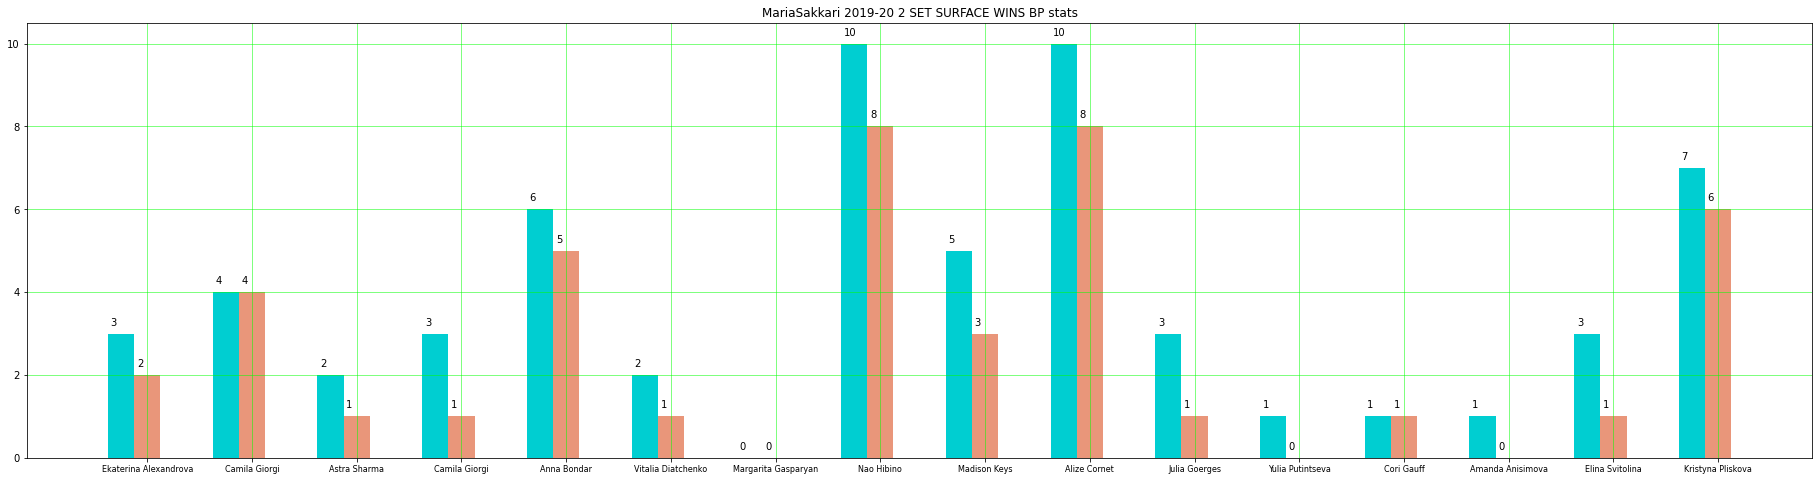

In [71]:
Plot_break_stats(P1_past2_S_W2,p1,"2019-20 2 SET SURFACE WINS",breaks_winner, plt)

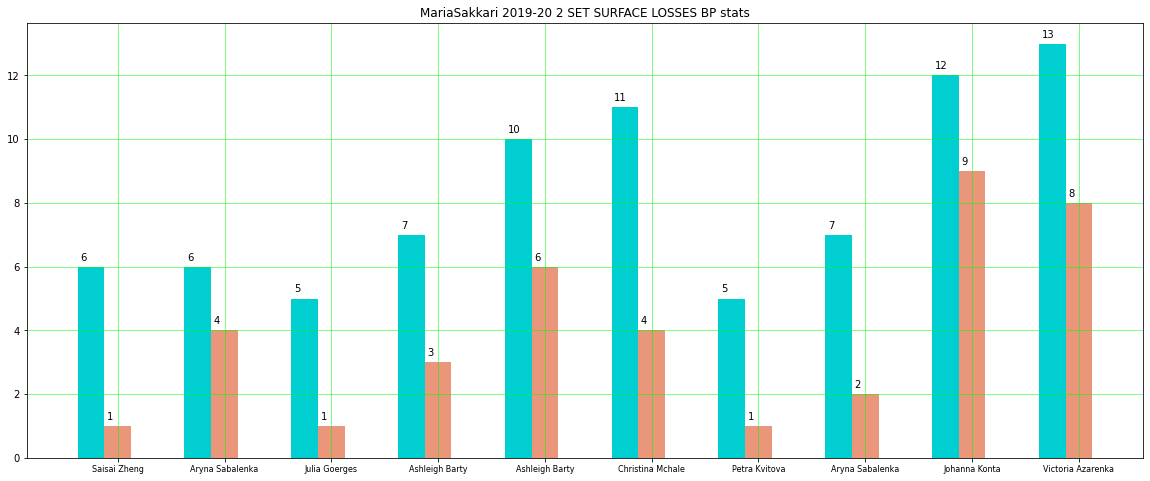

In [72]:
Plot_break_stats(P1_past2_S_L2,p1,"2019-20 2 SET SURFACE LOSSES",breaks_loser, plt)

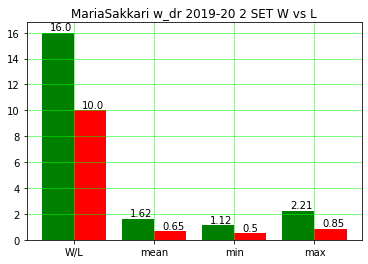

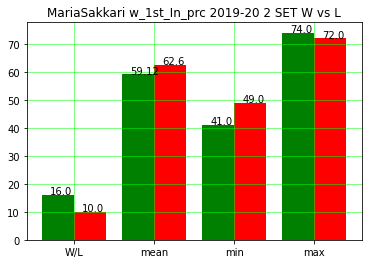

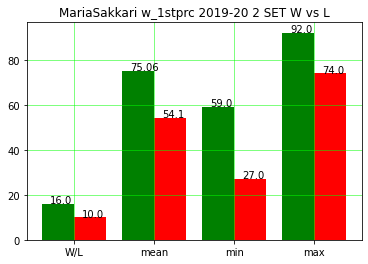

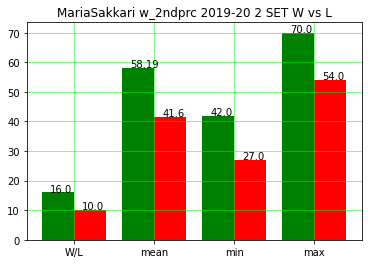

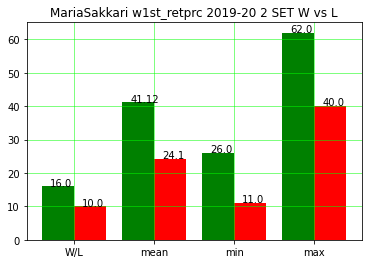

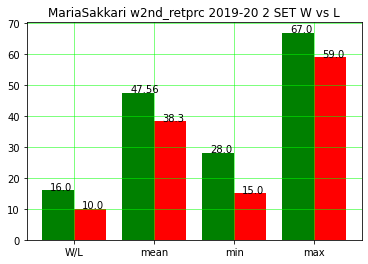

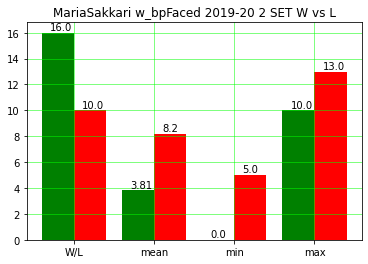

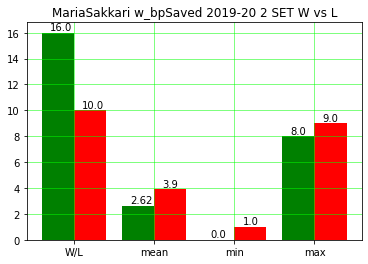

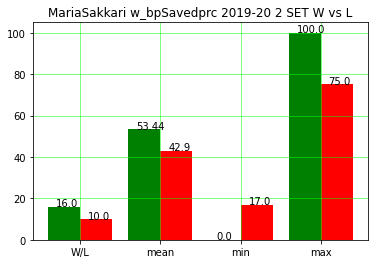

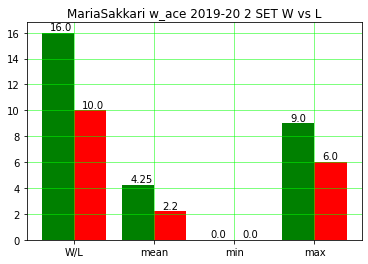

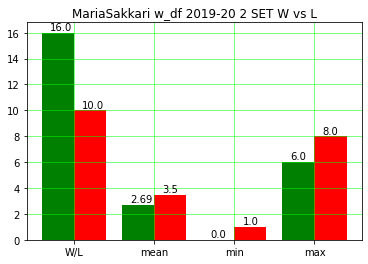

In [73]:
Compare_Plot(p1,P1_past2_S_W2_2D, P1_past2_S_L2_2D, W_describe, L_describe,"2019-20 2 SET",x_axis,w,plt)

In [74]:
print("{} 3 SET WINS IN PAST 2 Years on {} stats".format(x,s))
P1_past2_S_W3=yp2.query('winner_name=="{}" and surface=="{}" and nos==3'.format(x,s))[required_w]

P1_past2_S_W3=P1_past2_S_W3.fillna(0)

P1_past2_S_W3_2D=[]
for column in W_describe:

  P1_past2_S_W3_2D.append(P1_past2_S_W3[column].describe()[['count','mean','min','max']].to_numpy())
  
P1_past2_S_W3_2D=Zero_converter(P1_past2_S_W3_2D)

# P1_past2_S_W3_2D

# P1_past2_S_W3

Maria Sakkari 3 SET WINS IN PAST 2 Years on Hard stats


In [75]:
print("{} 3 SET LOSSES IN PAST 2 Years on {} stats".format(x,s))
P1_past2_S_L3=yp2.query('loser_name=="{}" and surface=="{}" and nos==3'.format(x,s))[required_l]

P1_past2_S_L3=P1_past2_S_L3.fillna(0)

P1_past2_S_L3_2D=[]
for column in L_describe:

  P1_past2_S_L3_2D.append(P1_past2_S_L3[column].describe()[['count','mean','min','max']].to_numpy()) 

P1_past2_S_L3_2D=Zero_converter(P1_past2_S_L3_2D)
# P1_past2_S_L3_2D

# P1_past2_S_L3

Maria Sakkari 3 SET LOSSES IN PAST 2 Years on Hard stats


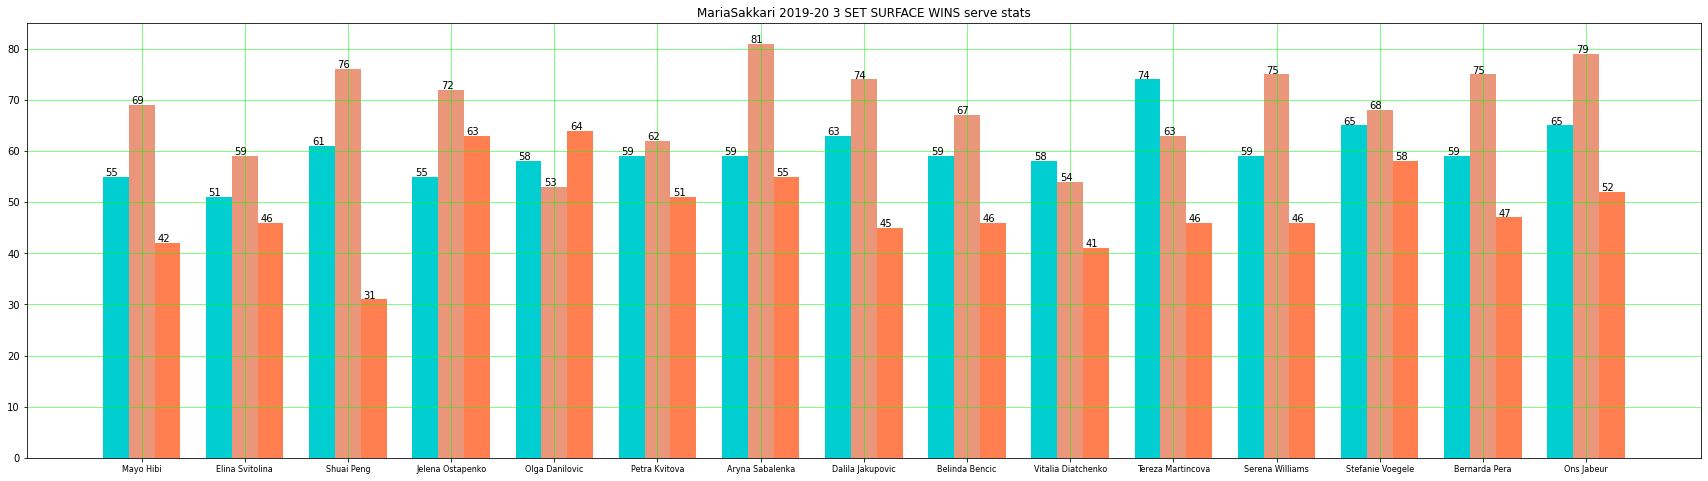

In [76]:
Plot_Serve_stats(P1_past2_S_W3,p1,"2019-20 3 SET SURFACE WINS",serve_winner,plt)

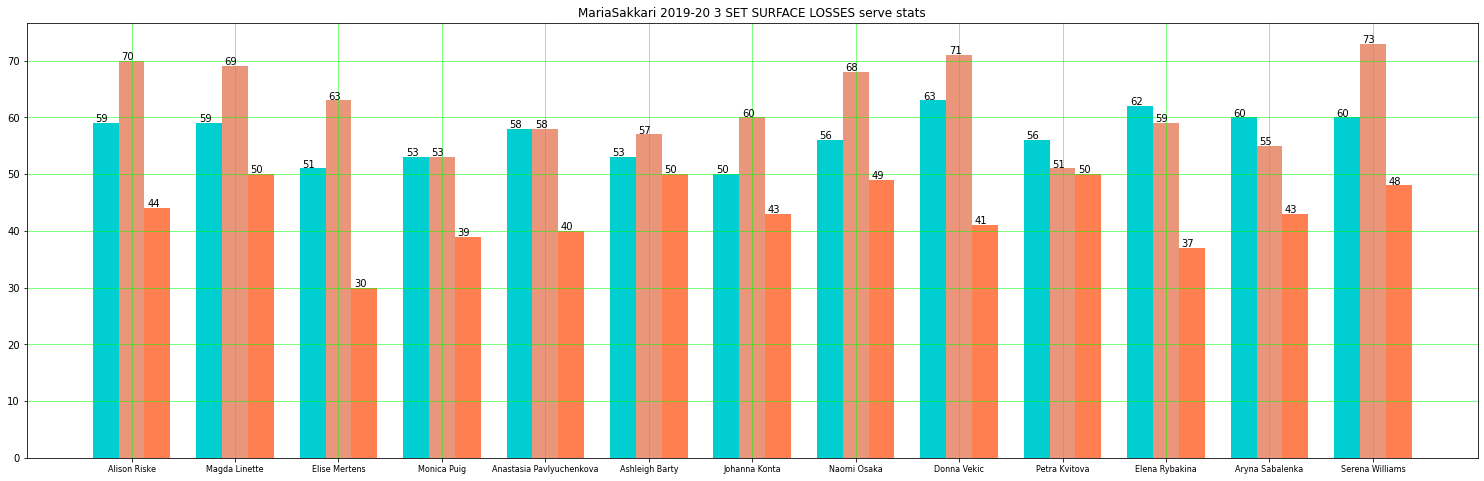

In [77]:

Plot_Serve_stats(P1_past2_S_L3,p1,"2019-20 3 SET SURFACE LOSSES",serve_loser,plt)

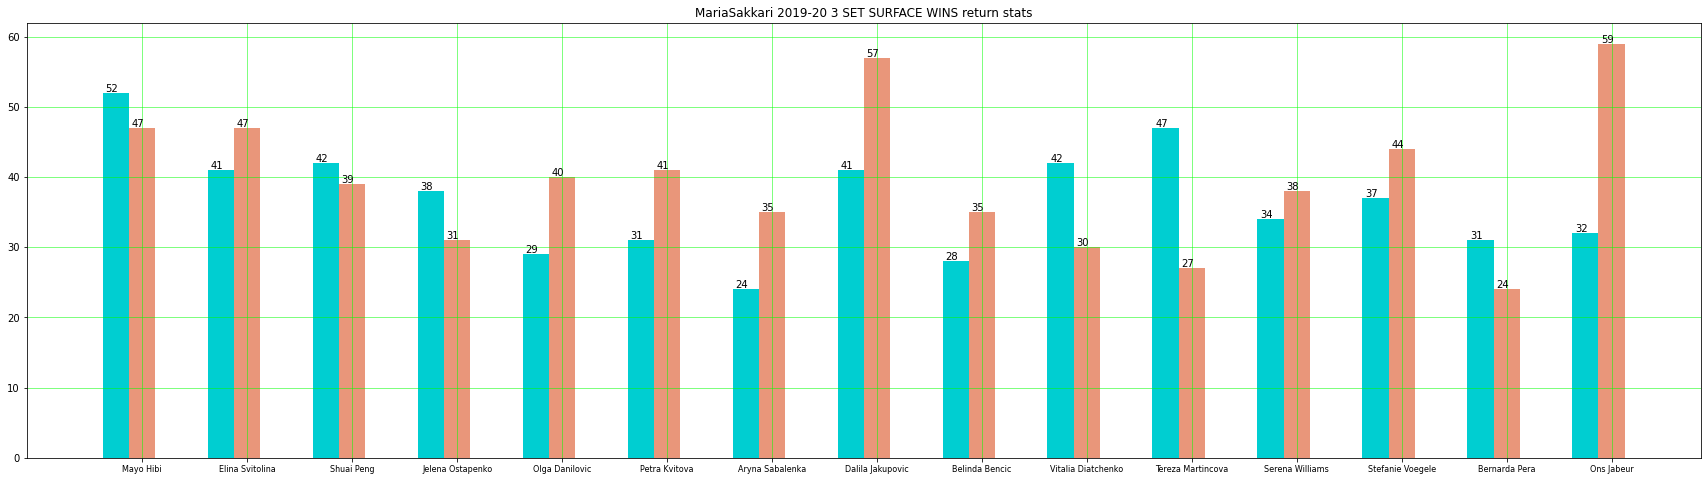

In [78]:
Plot_return_stats(P1_past2_S_W3,p1,"2019-20 3 SET SURFACE WINS",return_winner,plt)




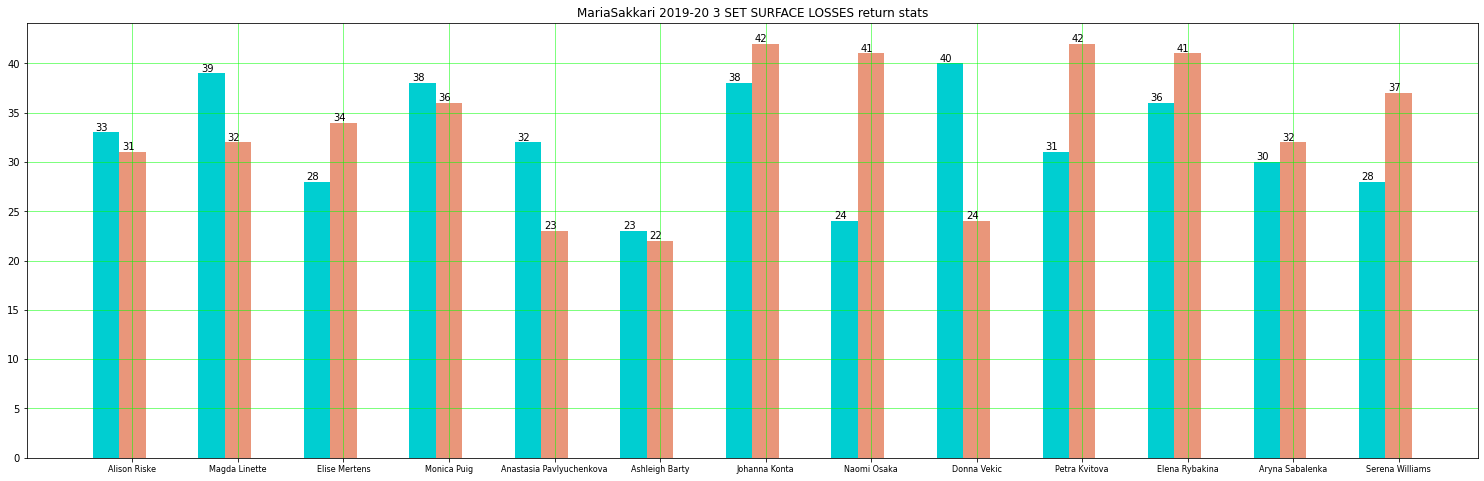

In [79]:
Plot_return_stats(P1_past2_S_L3,p1,"2019-20 3 SET SURFACE LOSSES",return_loser,plt)






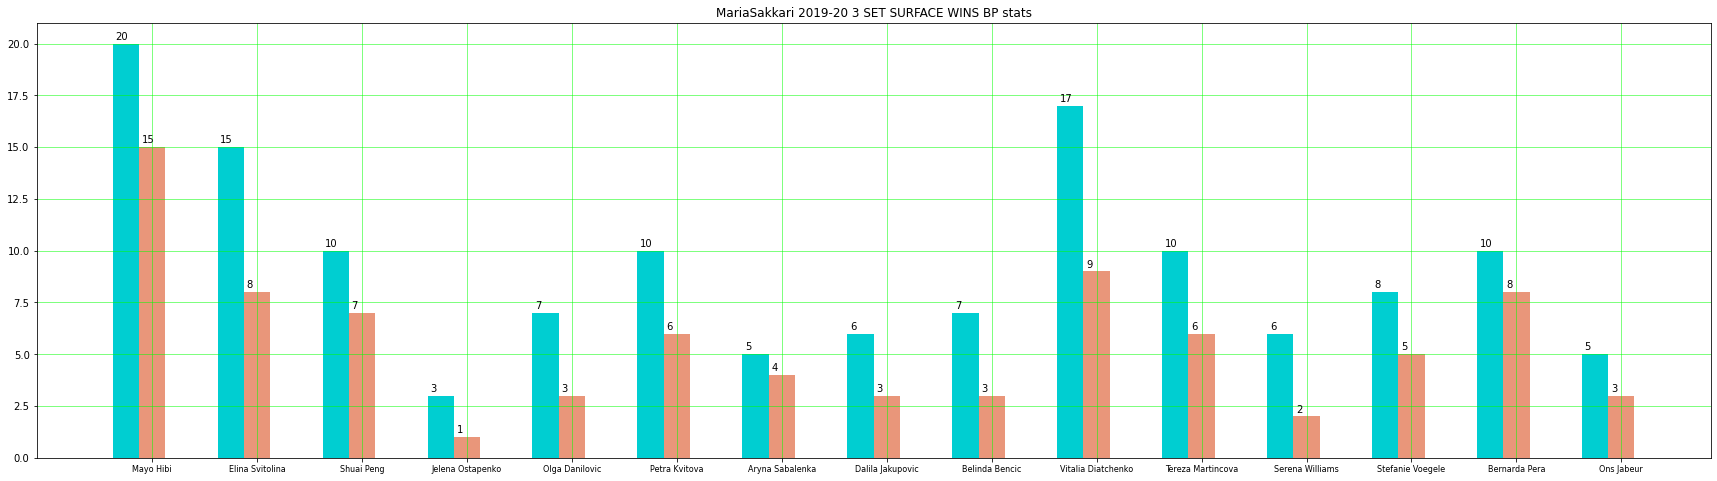

In [80]:
Plot_break_stats(P1_past2_S_W3,p1,"2019-20 3 SET SURFACE WINS",breaks_winner, plt)

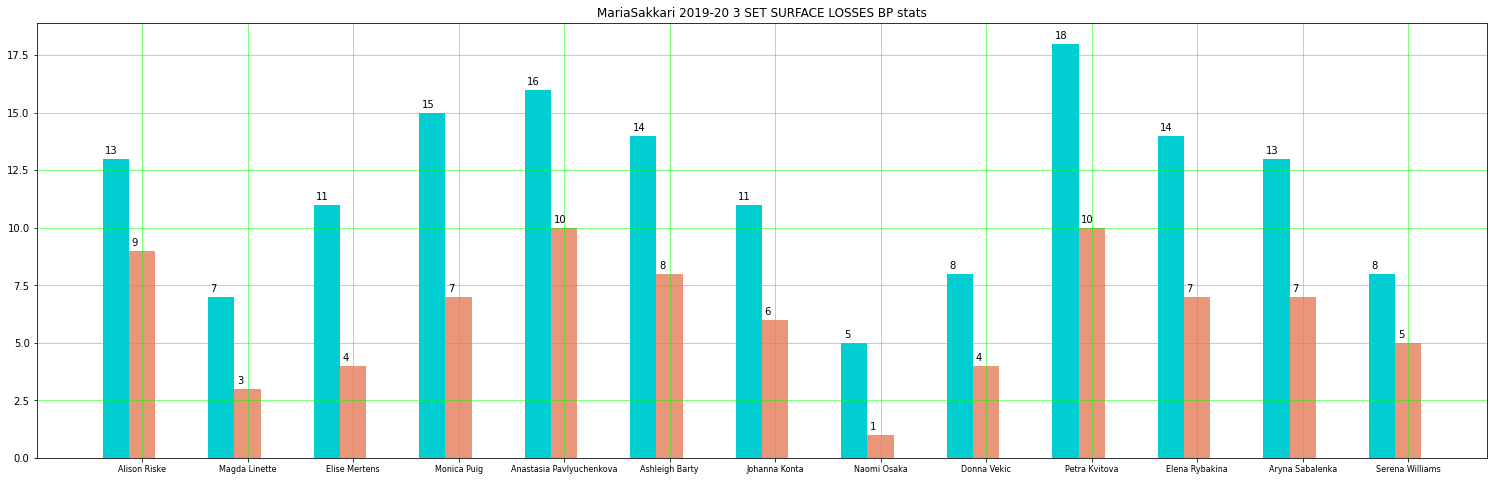

In [81]:
Plot_break_stats(P1_past2_S_L3,p1,"2019-20 3 SET SURFACE LOSSES",breaks_loser, plt)



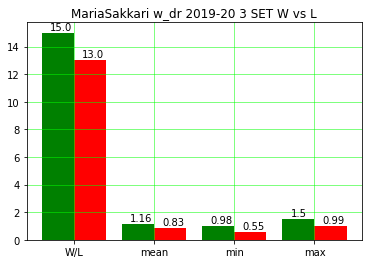

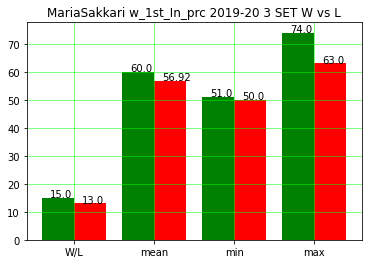

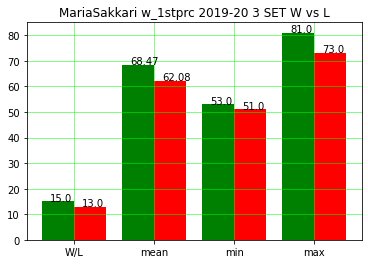

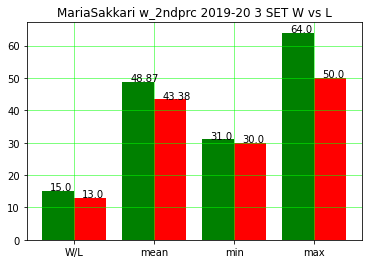

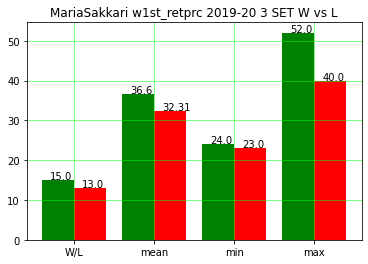

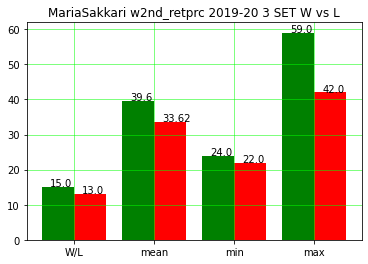

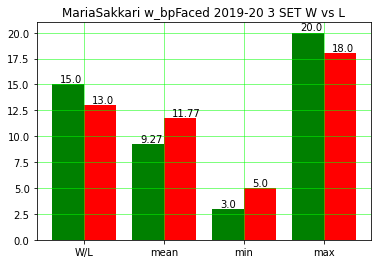

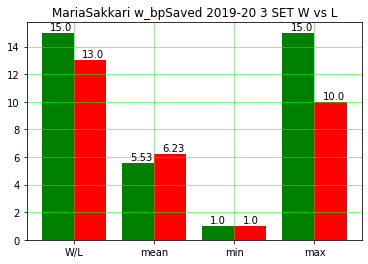

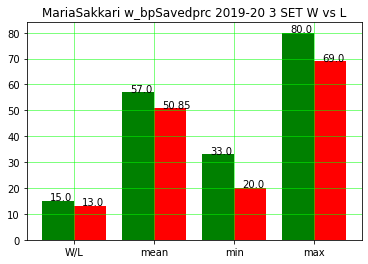

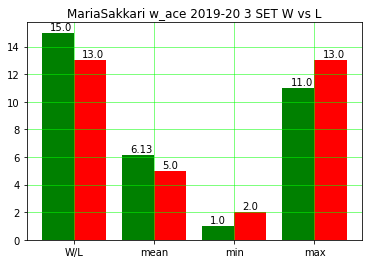

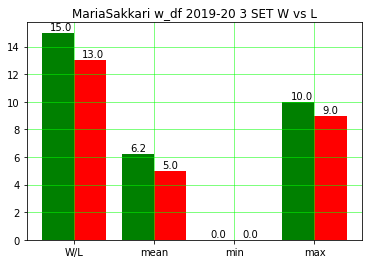

In [82]:
Compare_Plot(p1,P1_past2_S_W3_2D, P1_past2_S_L3_2D, W_describe, L_describe,"2019-20 3 SET",x_axis,w,plt)

In [83]:

print("{} 2 SET WINS IN 2021 stats".format(y))
P2_2021_W2=y2021.query('winner_name=="{}" and nos==2'.format(y))[required_w]
# P2_2021_W2
P2_2021_W2=P2_2021_W2.fillna(0)

Elina Svitolina 2 SET WINS IN 2021 stats


In [84]:
P2_2021_W2_2D=[]
for column in W_describe:

  P2_2021_W2_2D.append(P2_2021_W2[column].describe()[['count','mean','min','max']].to_numpy())
  


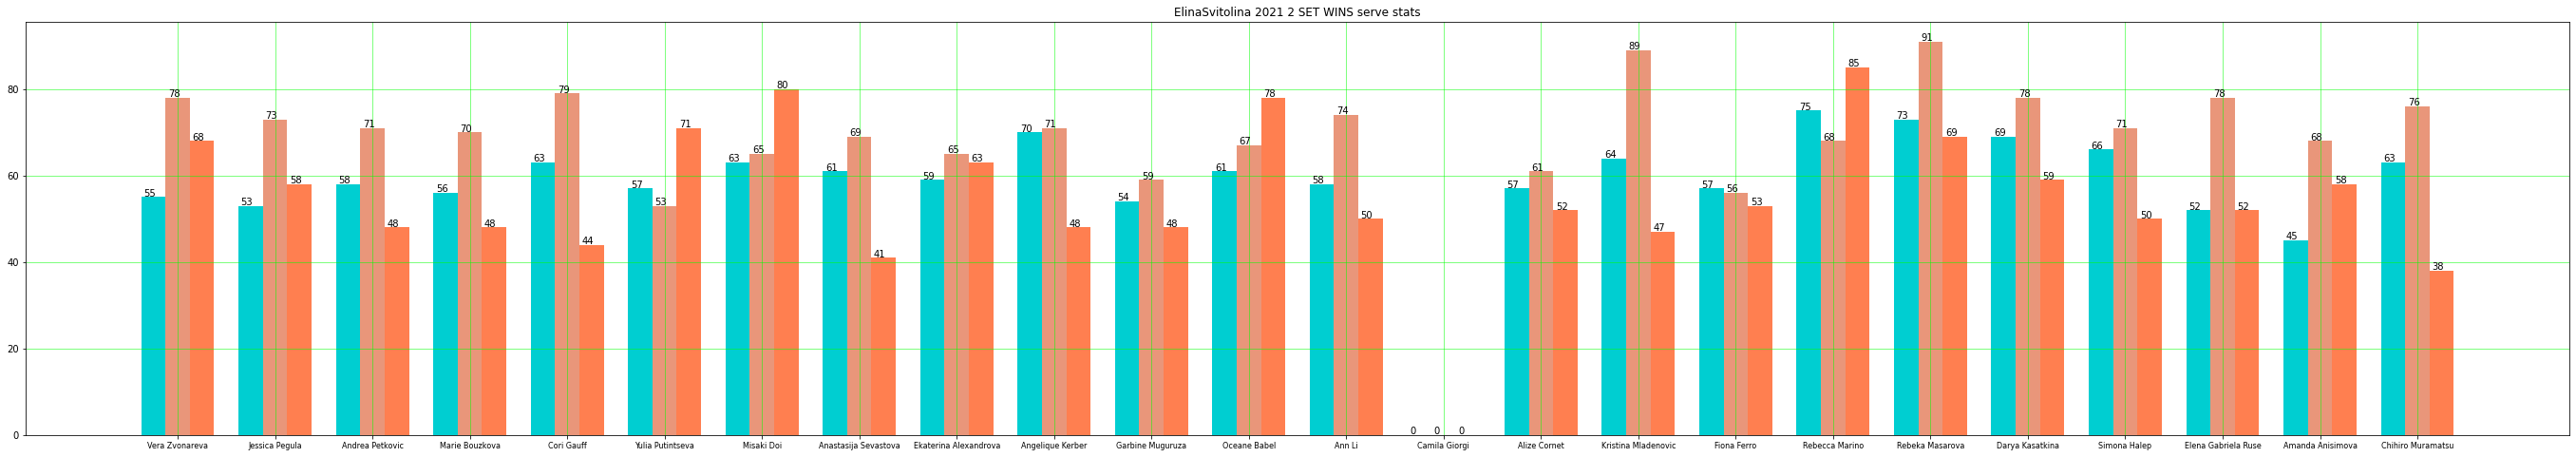

In [86]:
Plot_Serve_stats(P2_2021_W2,p2,"2021 2 SET WINS",serve_winner,plt)

In [87]:
# P2_2021_W2_2D


In [88]:
P2_2021_W2_2D=Zero_converter(P2_2021_W2_2D)


In [89]:
print("{} 2 SET LOSSES IN 2021 stats".format(y))
P2_2021_L2=y2021.query('loser_name=="{}" and nos==2 '.format(y))[required_l]

P2_2021_L2=P2_2021_L2.fillna(0)
P2_2021_L2_2D=[]
for column in L_describe:

  P2_2021_L2_2D.append(P2_2021_L2[column].describe()[['count','mean','min','max']].to_numpy())
  
P2_2021_L2_2D=Zero_converter(P2_2021_L2_2D)
#P2_2021_L2_2D

# P2_2021_L2

Elina Svitolina 2 SET LOSSES IN 2021 stats


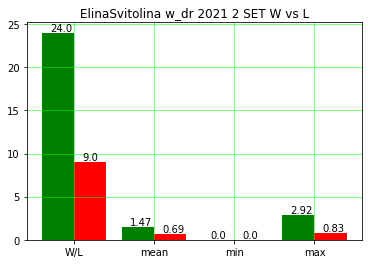

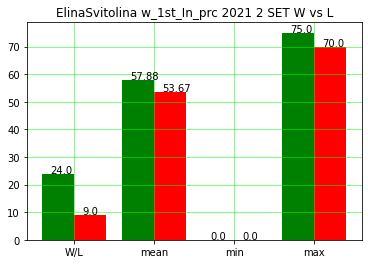

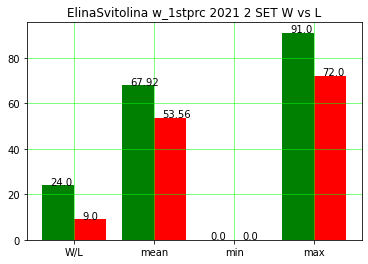

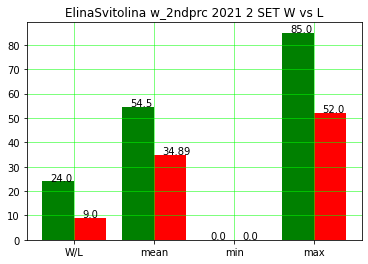

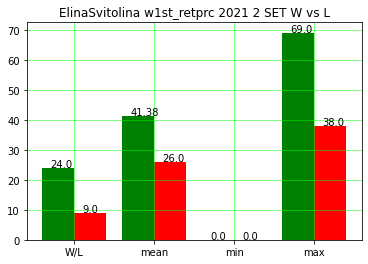

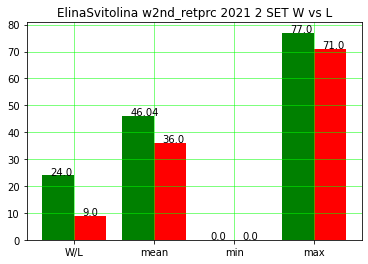

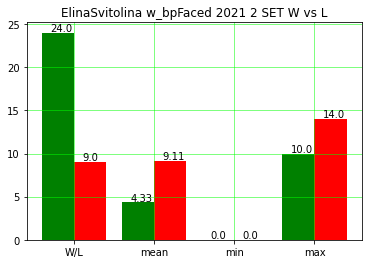

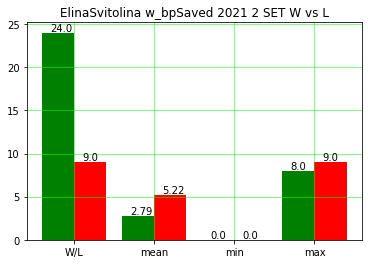

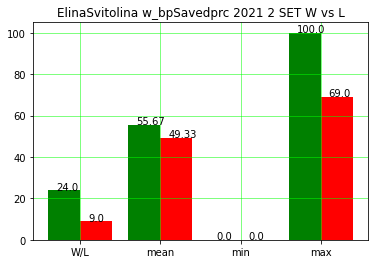

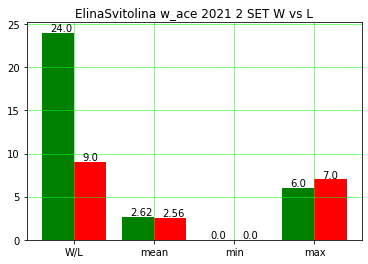

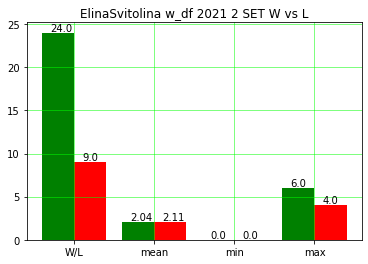

In [90]:
Compare_Plot(p2,P2_2021_W2_2D,P2_2021_L2_2D,W_describe,L_describe,"2021 2 SET",x_axis,w,plt)

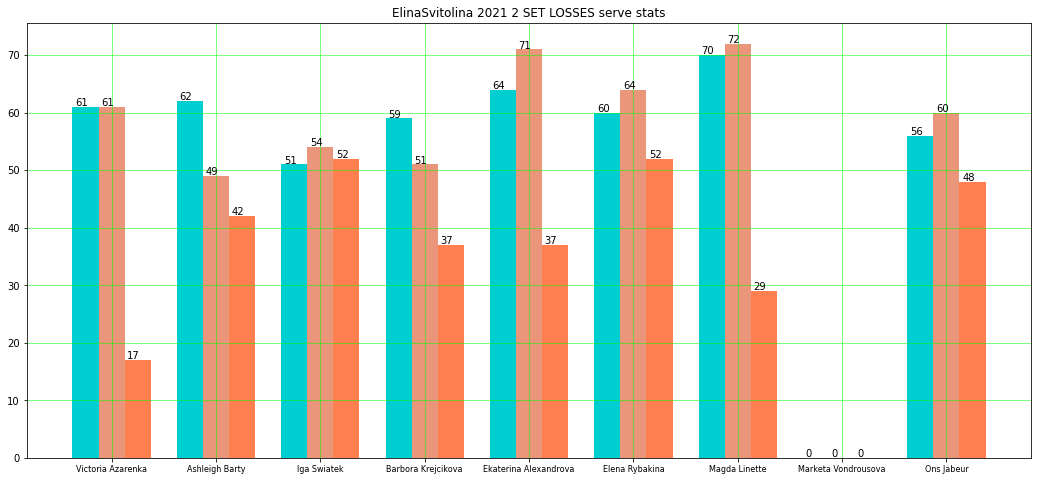

In [91]:
Plot_Serve_stats(P2_2021_L2,p2,"2021 2 SET LOSSES",serve_loser,plt)

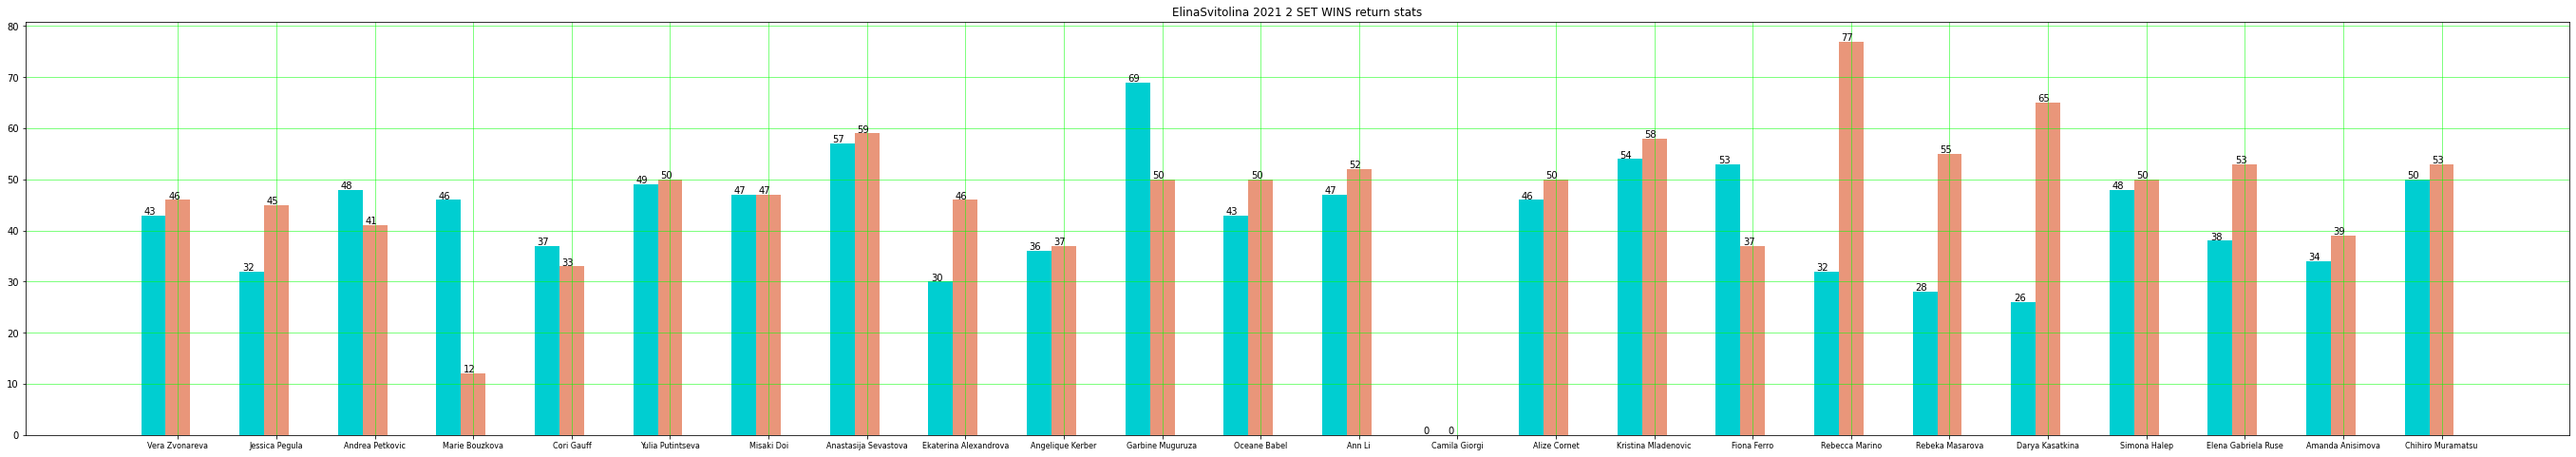

In [94]:
Plot_return_stats(P2_2021_W2,p2,"2021 2 SET WINS",return_winner,plt)


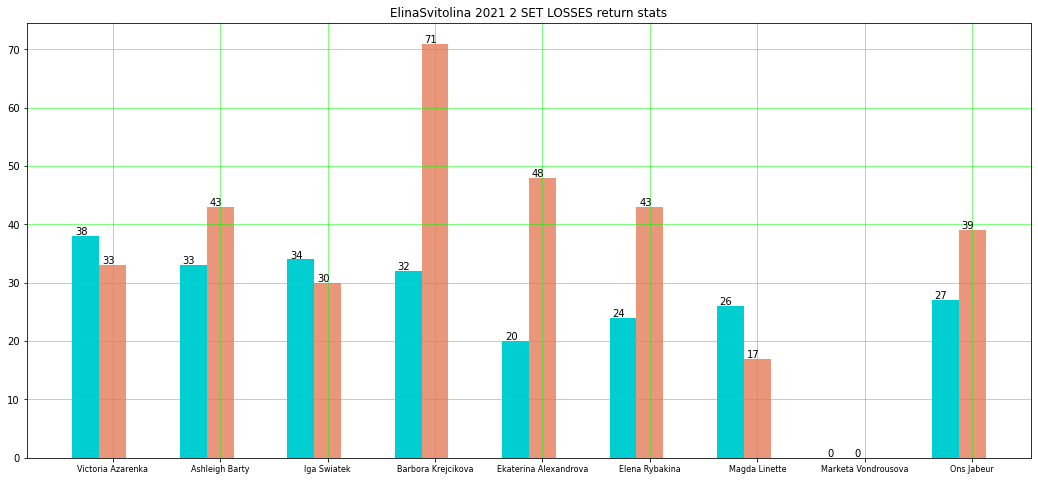

In [95]:
Plot_return_stats(P2_2021_L2,p2,"2021 2 SET LOSSES",return_loser    ,plt)

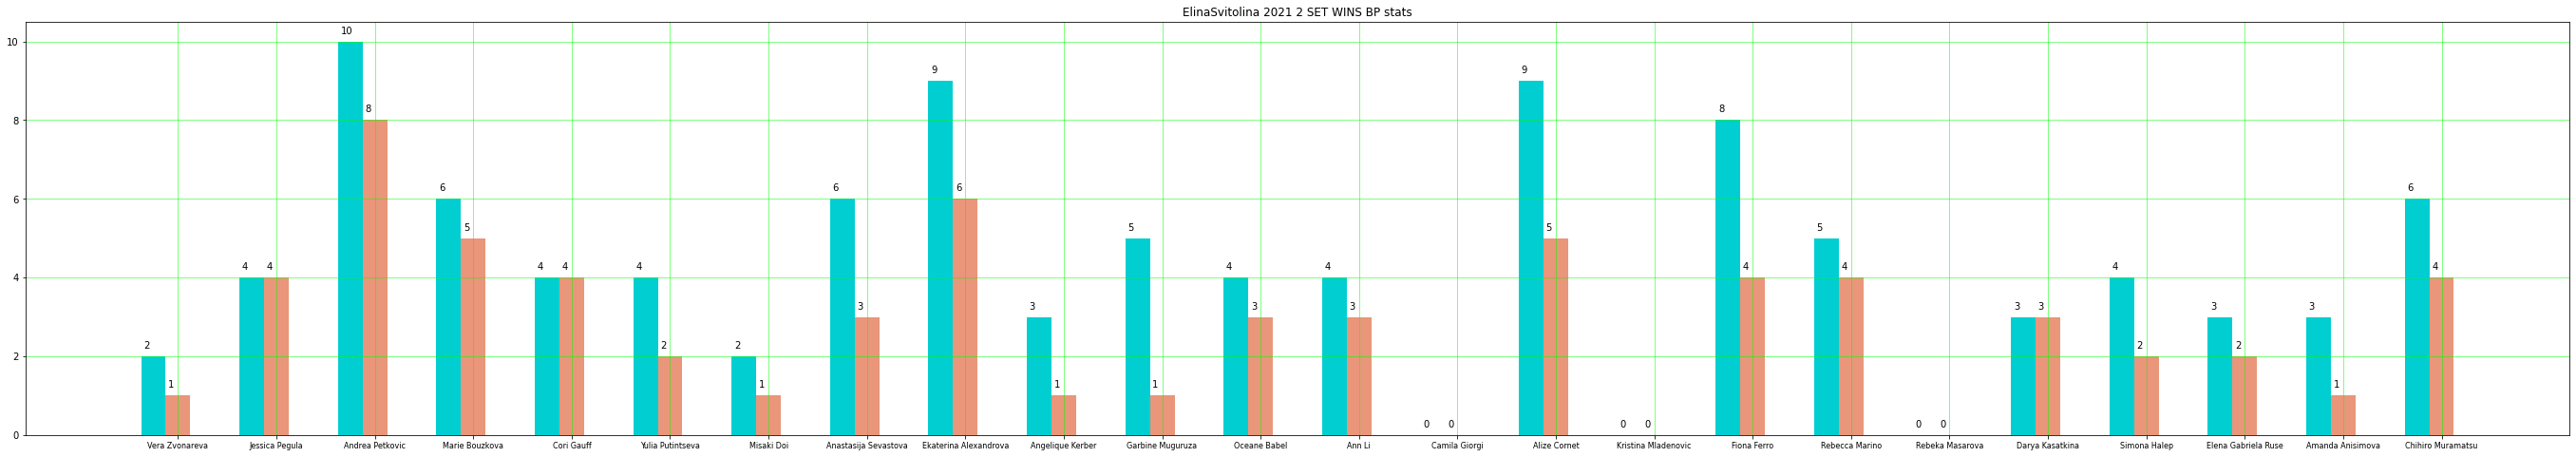

In [96]:

Plot_break_stats(P2_2021_W2,p2,"2021 2 SET WINS",breaks_winner, plt)

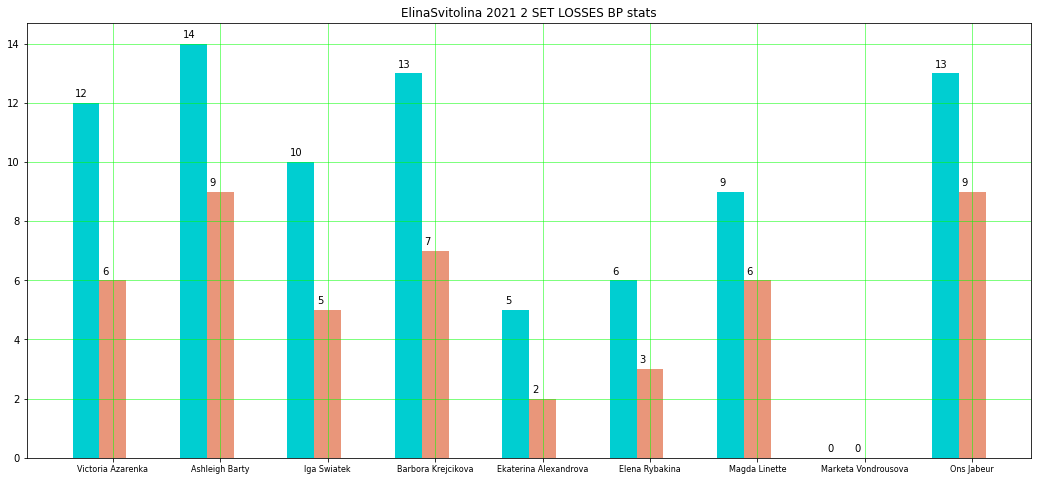

In [97]:
Plot_break_stats(P2_2021_L2,p2,"2021 2 SET LOSSES",breaks_loser, plt)

In [98]:
print("{} 3 SET WINS IN 2021 stats".format(y))
P2_2021_W3=y2021.query('winner_name=="{}" and nos==3 '.format(y))[required_w]
P2_2021_W3=P2_2021_W3.fillna(0)

P2_2021_W3_2D=[]
for column in W_describe:

  P2_2021_W3_2D.append(P2_2021_W3[column].describe()[['count','mean','min','max']].to_numpy())

P2_2021_W3_2D=Zero_converter(P2_2021_W3_2D)

# P2_2021_W3

Elina Svitolina 3 SET WINS IN 2021 stats


In [99]:
print("{} 3 SET LOSSES IN 2021 stats".format(y))
P2_2021_L3=y2021.query('loser_name=="{}" and nos==3 '.format(y))[required_l]
P2_2021_L3=P2_2021_L3.fillna(0)

P2_2021_L3_2D=[]
for column in L_describe:

  P2_2021_L3_2D.append(P2_2021_L3[column].describe()[['count','mean','min','max']].to_numpy())

P2_2021_L3_2D=Zero_converter(P2_2021_L3_2D)
#P2_2021_L3_2D

# P2_2021_L3

Elina Svitolina 3 SET LOSSES IN 2021 stats


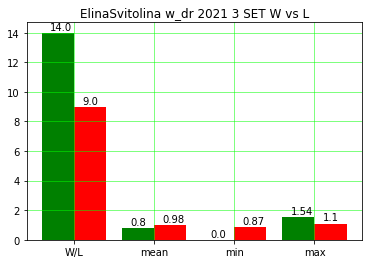

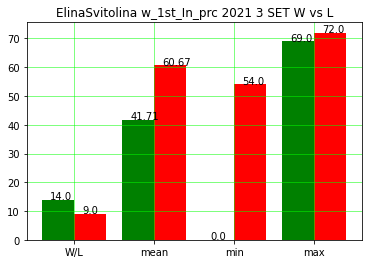

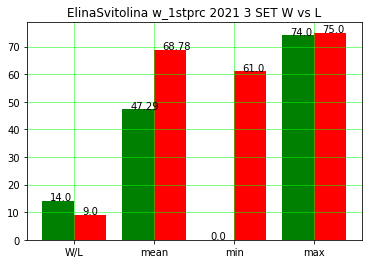

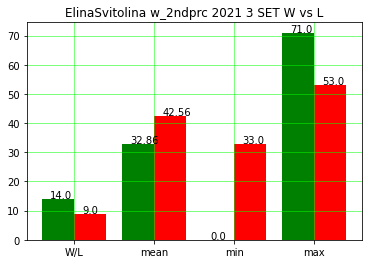

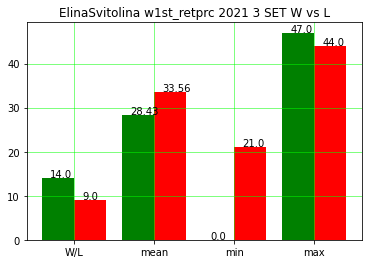

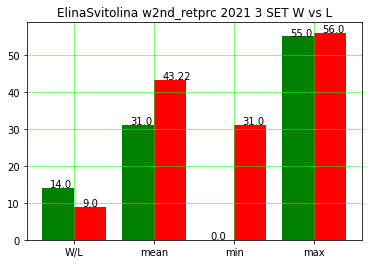

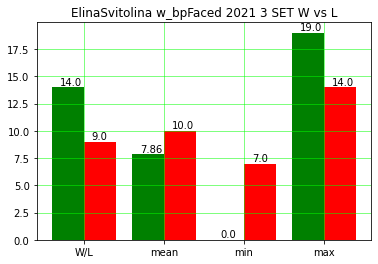

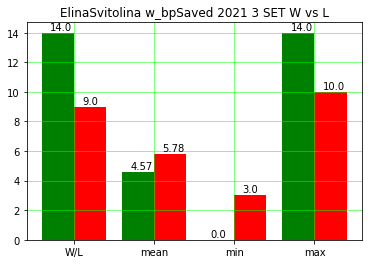

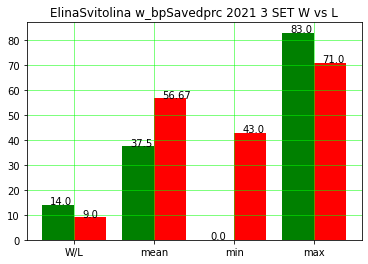

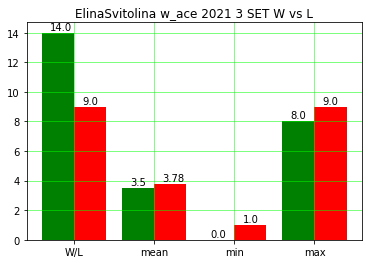

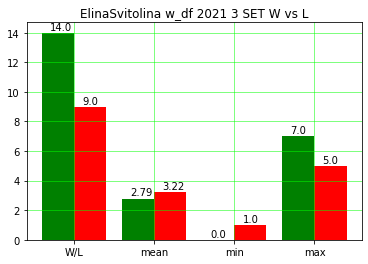

In [100]:
Compare_Plot(p2,P2_2021_W3_2D,P2_2021_L3_2D,W_describe,L_describe,"2021 3 SET",x_axis,w,plt)

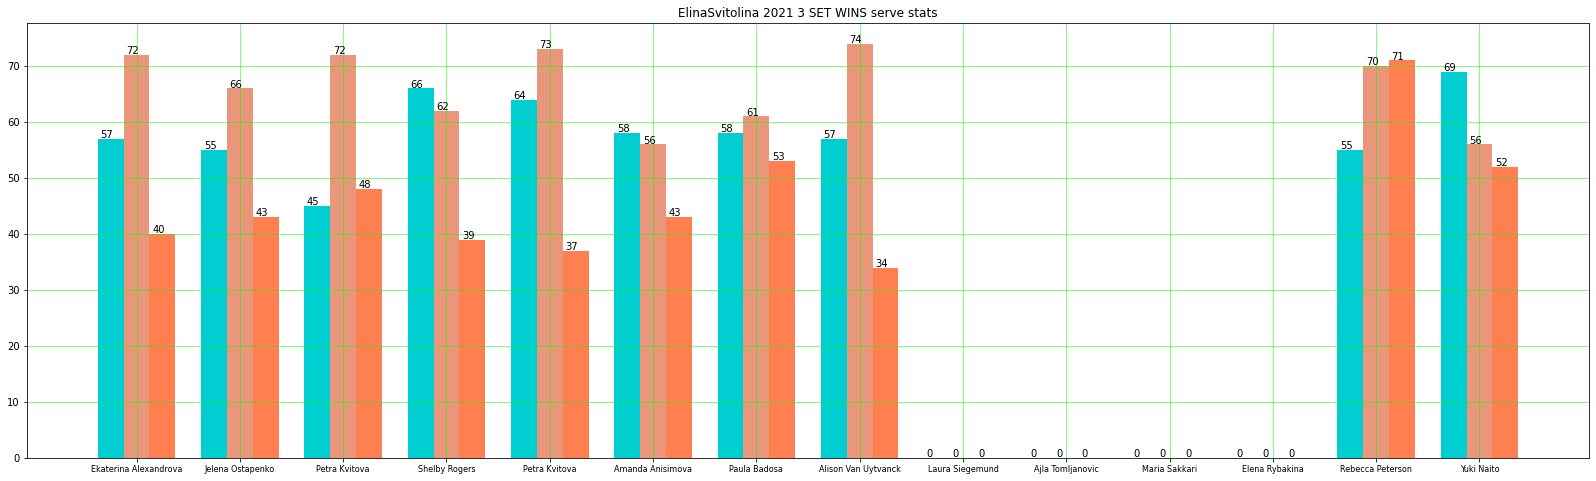

In [101]:

Plot_Serve_stats(P2_2021_W3,p2,"2021 3 SET WINS",serve_winner,plt)

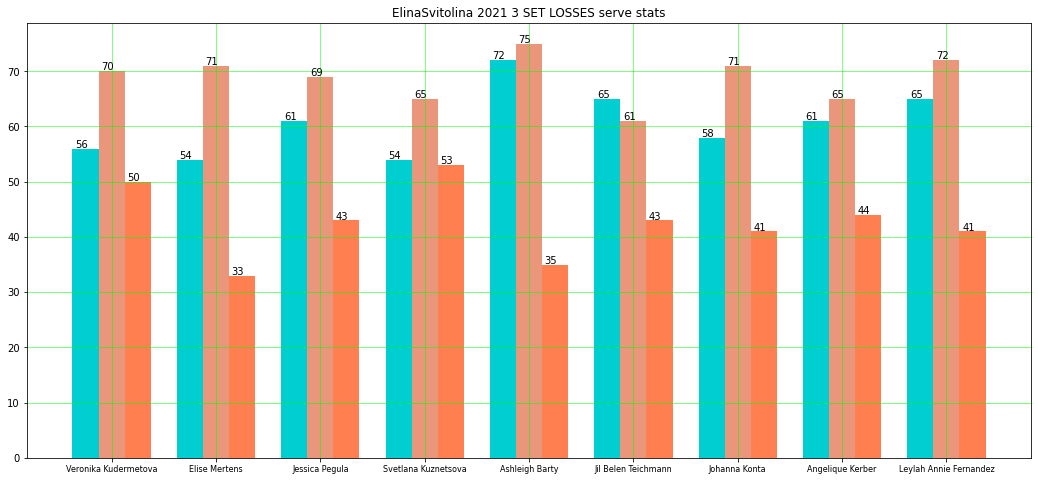

In [102]:

Plot_Serve_stats(P2_2021_L3,p2,"2021 3 SET LOSSES",serve_loser,plt)

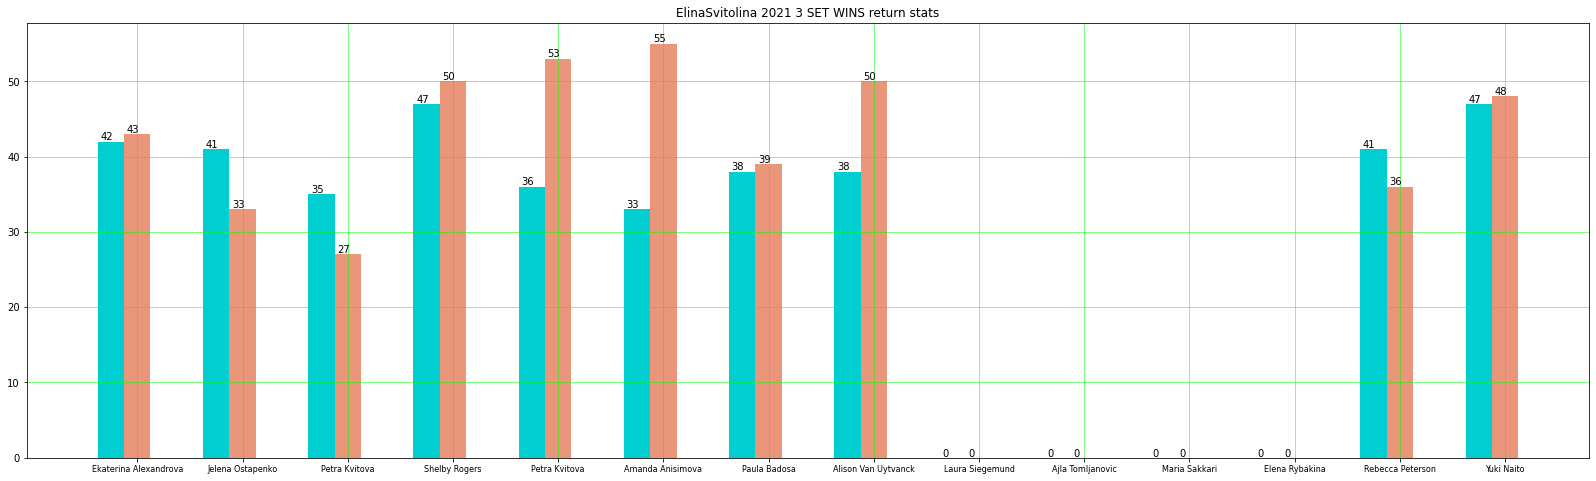

In [103]:
Plot_return_stats(P2_2021_W3,p2,"2021 3 SET WINS",return_winner,plt)

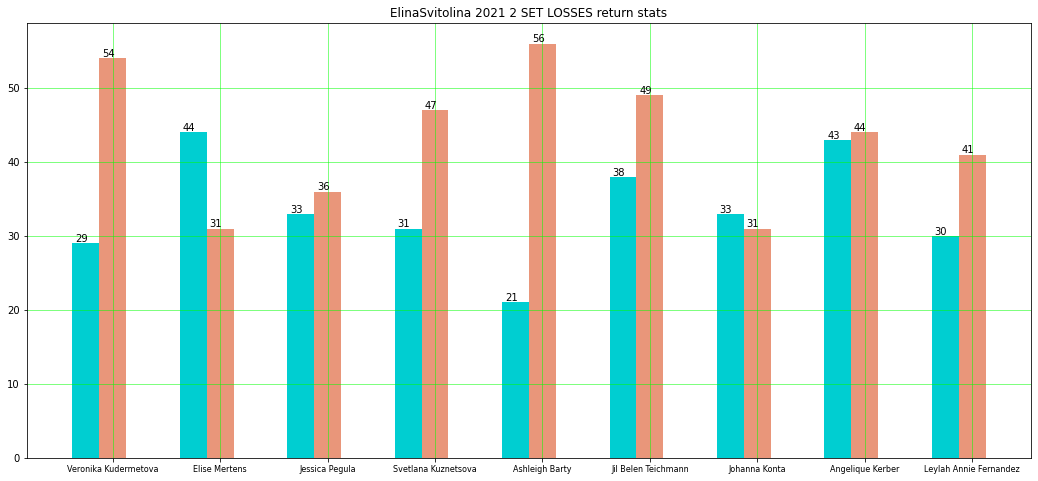

In [104]:
Plot_return_stats(P2_2021_L3,p2,"2021 2 SET LOSSES",return_loser,plt)

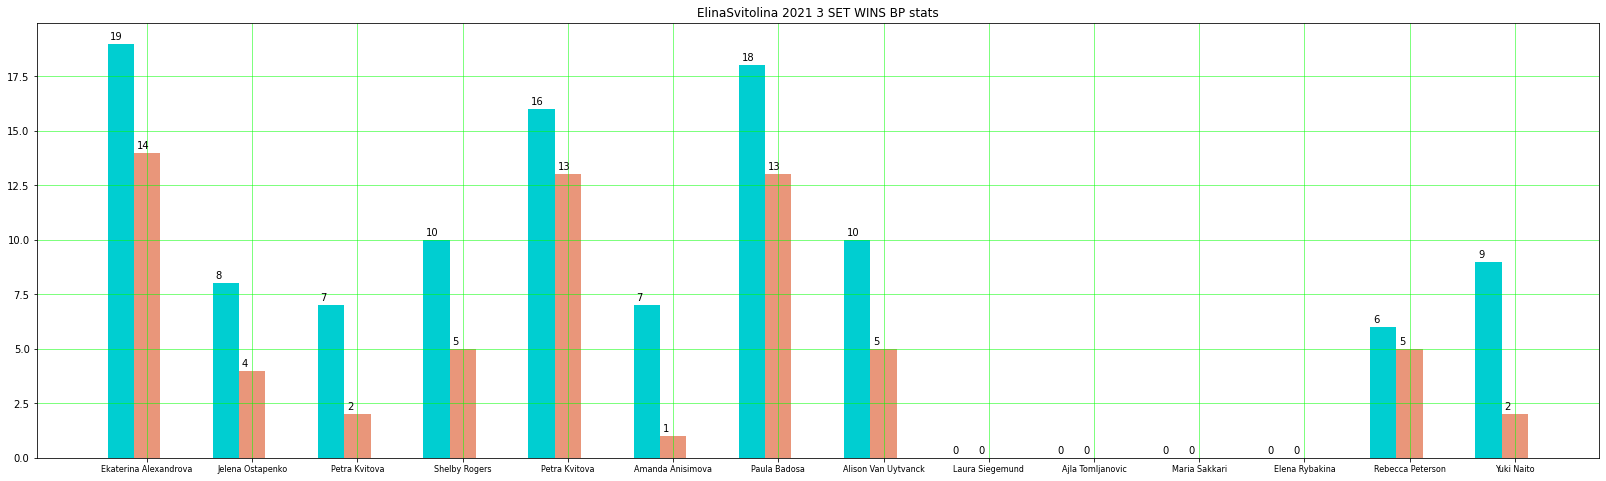

In [105]:
Plot_break_stats(P2_2021_W3,p2,"2021 3 SET WINS",breaks_winner, plt)


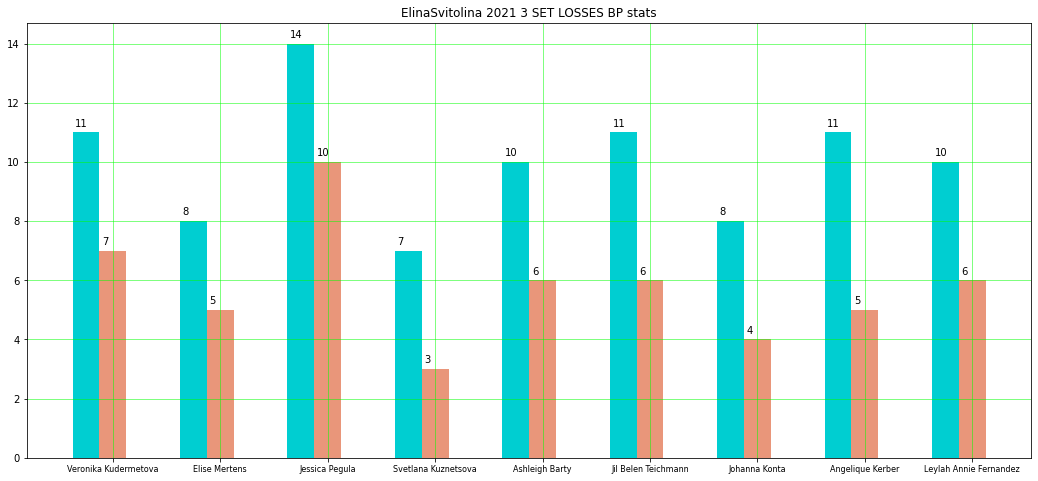

In [106]:
Plot_break_stats(P2_2021_L3,p2,"2021 3 SET LOSSES",breaks_loser, plt)

In [107]:
print("{} 2 SET WINS IN PAST 2 Years on {} stats".format(y,s))
P2_past2_S_W2=yp2.query('winner_name=="{}" and surface=="{}" and nos==2'.format(y,s))[required_w]
P2_past2_S_W2=P2_past2_S_W2.fillna(0)

P2_past2_S_W2_2D=[]
for column in W_describe:

  P2_past2_S_W2_2D.append(P2_past2_S_W2[column].describe()[['count','mean','min','max']].to_numpy())

P2_past2_S_W2_2D=Zero_converter(P2_past2_S_W2_2D)
# P2_past2_S_W2_2D

# P2_past2_S_W2

Elina Svitolina 2 SET WINS IN PAST 2 Years on Hard stats


In [108]:
print("{} 2 SET LOSSES IN PAST 2 Years on {} stats".format(y,s))
P2_past2_S_L2=yp2.query('loser_name=="{}" and surface=="{}" and nos==2'.format(y,s))[required_l]
P2_past2_S_L2=P2_past2_S_L2.fillna(0)

P2_past2_S_L2_2D=[]
for column in L_describe:

  P2_past2_S_L2_2D.append(P2_past2_S_L2[column].describe()[['count','mean','min','max']].to_numpy()) 

P2_past2_S_L2_2D=Zero_converter(P2_past2_S_L2_2D)
# P2_past2_S_L2_2D
# P2_past2_S_L2

Elina Svitolina 2 SET LOSSES IN PAST 2 Years on Hard stats


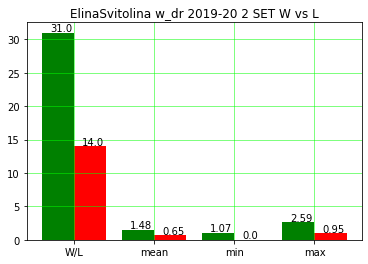

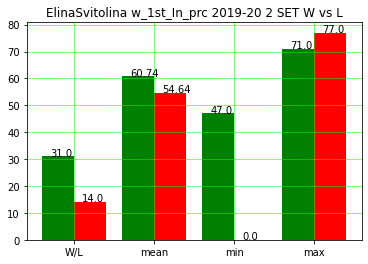

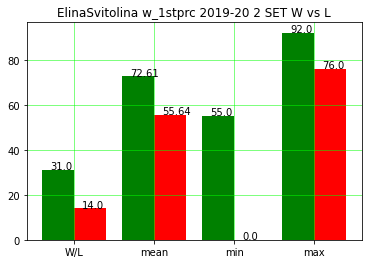

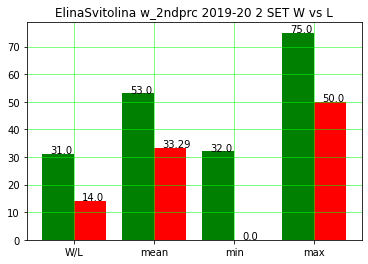

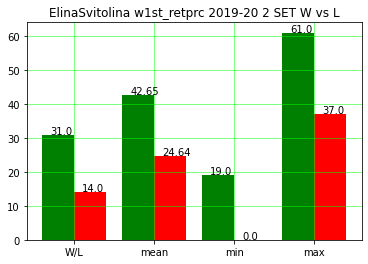

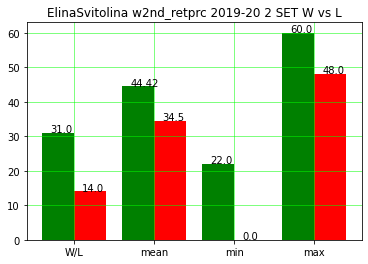

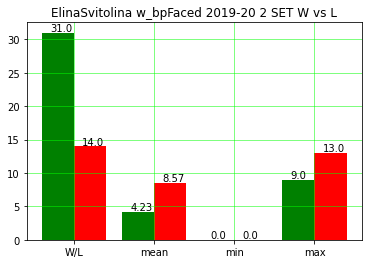

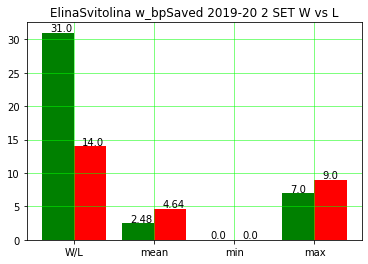

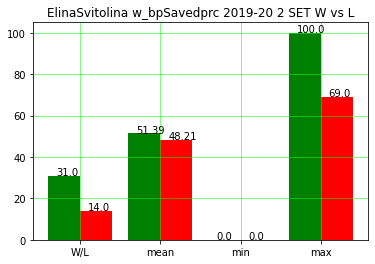

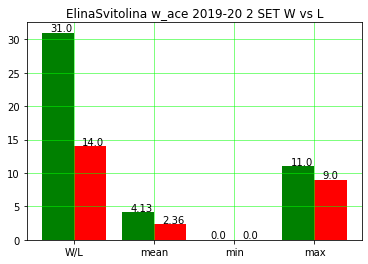

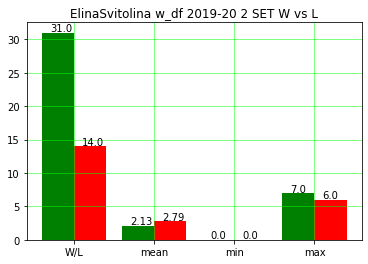

In [109]:
Compare_Plot(p2,P2_past2_S_W2_2D, P2_past2_S_L2_2D, W_describe, L_describe,"2019-20 2 SET",x_axis,w,plt) 

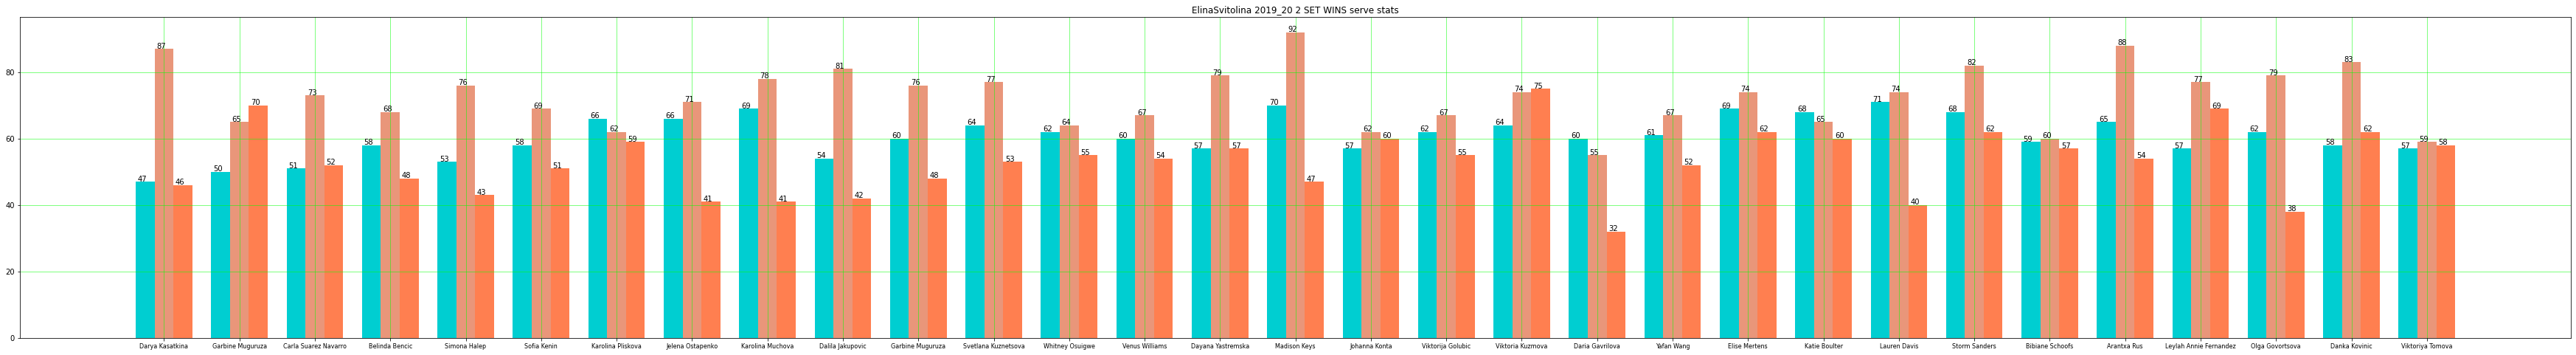

In [110]:
Plot_Serve_stats(P2_past2_S_W2,p2,"2019_20 2 SET WINS",serve_winner,plt)

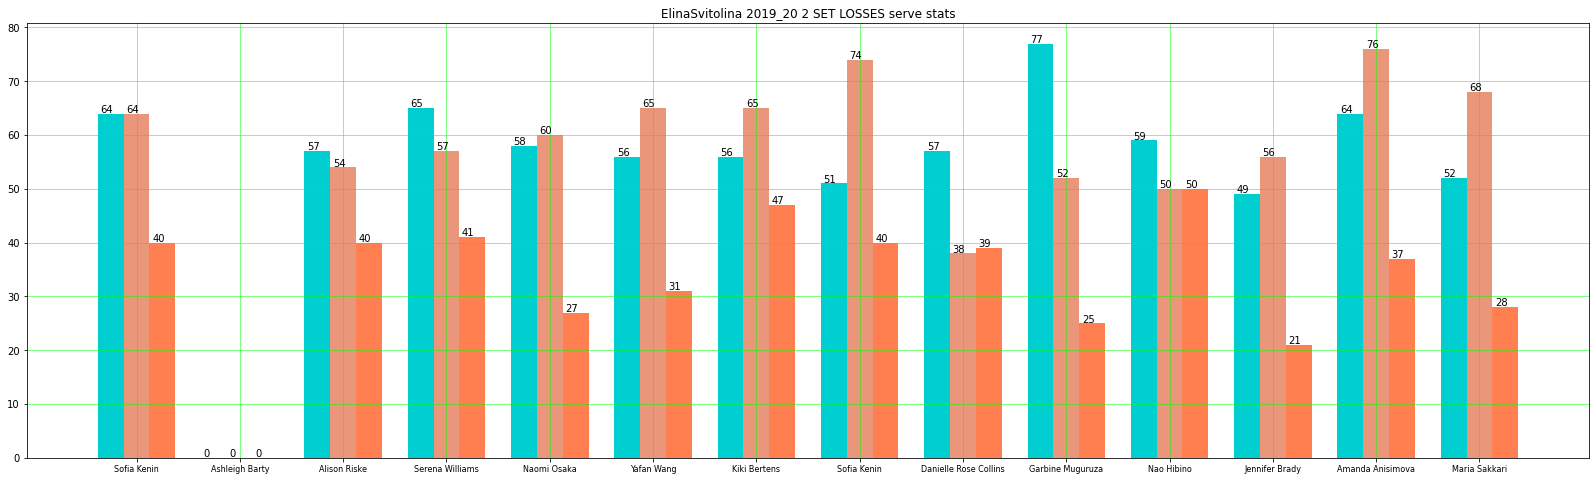

In [111]:
Plot_Serve_stats(P2_past2_S_L2,p2,"2019_20 2 SET LOSSES",serve_loser,plt)

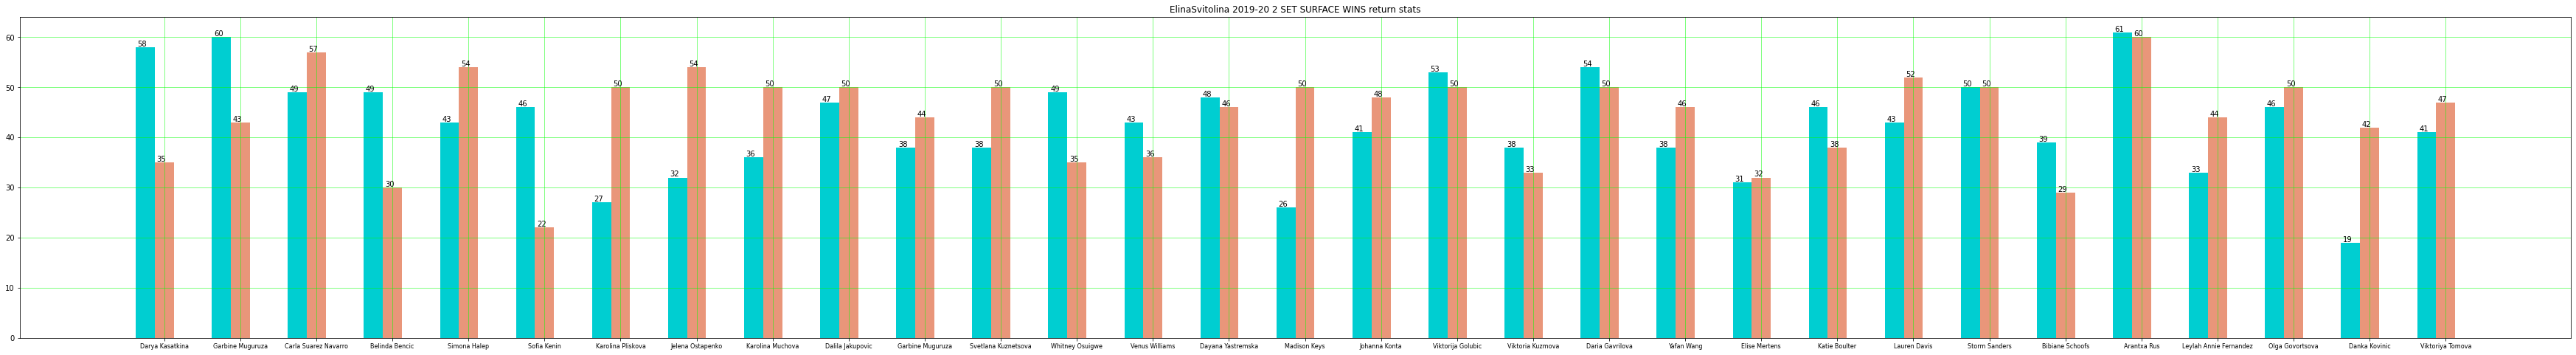

In [112]:

Plot_return_stats(P2_past2_S_W2,p2,"2019-20 2 SET SURFACE WINS",return_winner,plt)

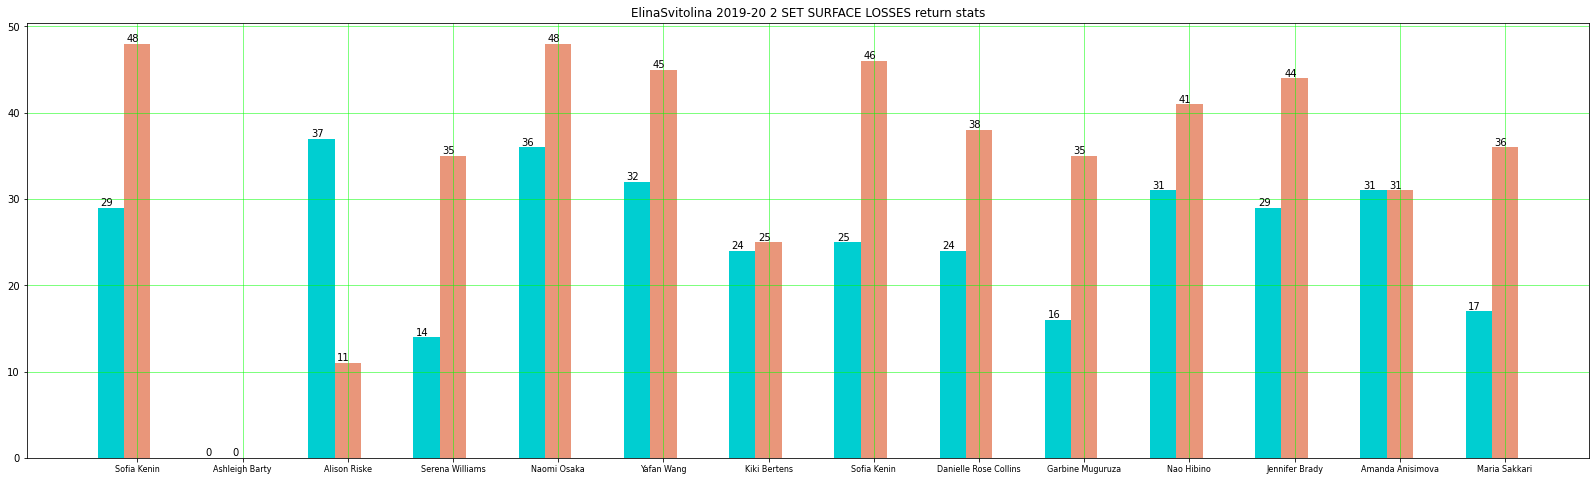

In [113]:
Plot_return_stats(P2_past2_S_L2,p2,"2019-20 2 SET SURFACE LOSSES",return_loser,plt)

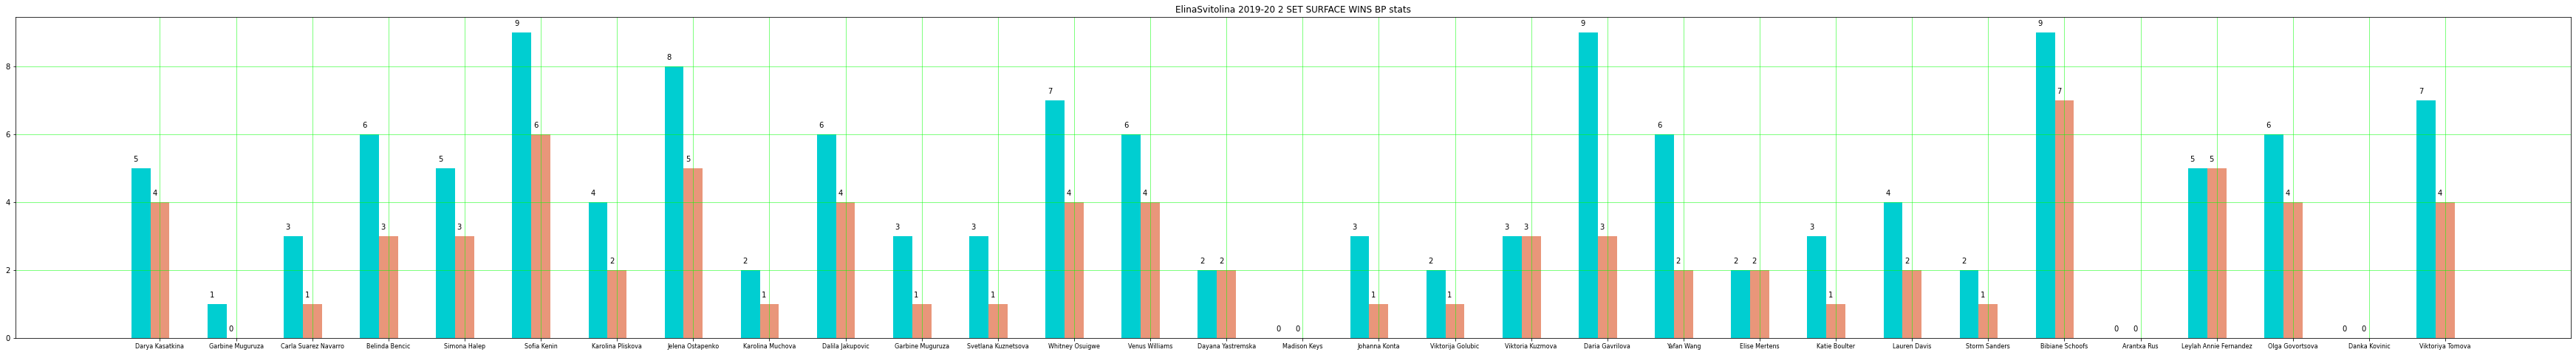

In [114]:

Plot_break_stats(P2_past2_S_W2,p2,"2019-20 2 SET SURFACE WINS",breaks_winner, plt)

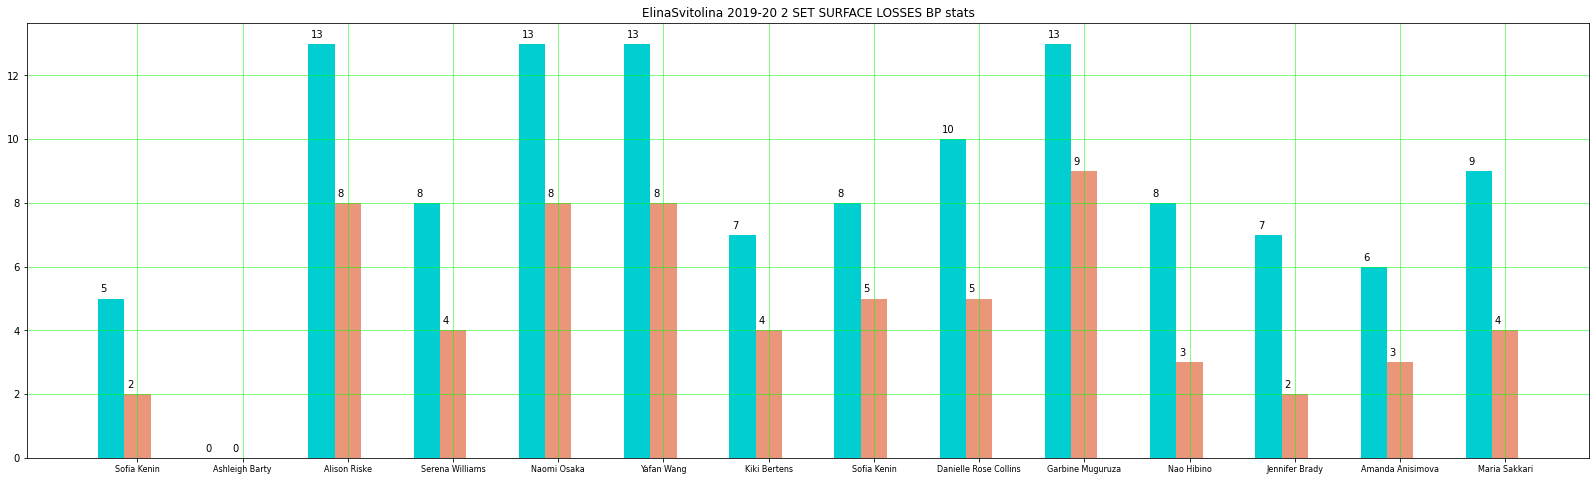

In [115]:
Plot_break_stats(P2_past2_S_L2,p2,"2019-20 2 SET SURFACE LOSSES",breaks_loser, plt)

In [116]:
print("{} 3 SET WINS IN PAST 2 Years on {} stats".format(y,s))
P2_past2_S_W3=yp2.query('winner_name=="{}" and surface=="{}" and nos==3'.format(y,s))[required_w]

P2_past2_S_W3=P2_past2_S_W3.fillna(0)

P2_past2_S_W3_2D=[]
for column in W_describe:

  P2_past2_S_W3_2D.append(P2_past2_S_W3[column].describe()[['count','mean','min','max']].to_numpy())
  
P2_past2_S_W3_2D=Zero_converter(P2_past2_S_W3_2D)

# P2_past2_S_W3_2D

# P2_past2_S_W3

Elina Svitolina 3 SET WINS IN PAST 2 Years on Hard stats


In [117]:
print("{} 3 SET LOSSES IN PAST 2 Years on {} stats".format(y,s))
P2_past2_S_L3=yp2.query('loser_name=="{}" and surface=="{}" and nos==3'.format(y,s))[required_l]

P2_past2_S_L3=P2_past2_S_L3.fillna(0)


P2_past2_S_L3_2D=[]
for column in L_describe:

  P2_past2_S_L3_2D.append(P2_past2_S_L3[column].describe()[['count','mean','min','max']].to_numpy()) 

P2_past2_S_L3_2D=Zero_converter(P2_past2_S_L3_2D)
# P2_past2_S_L3_2D

# P2_past2_S_L3

Elina Svitolina 3 SET LOSSES IN PAST 2 Years on Hard stats


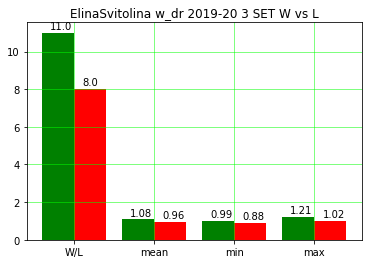

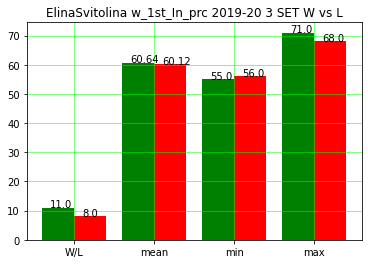

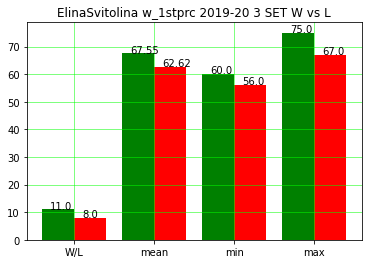

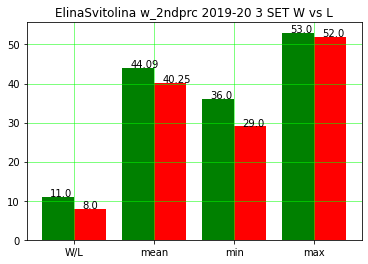

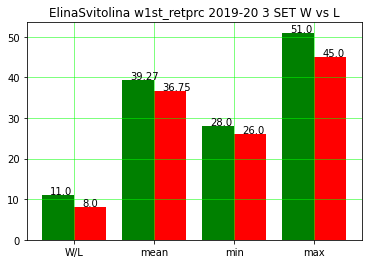

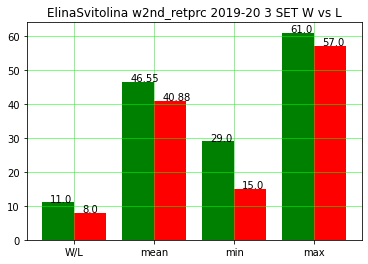

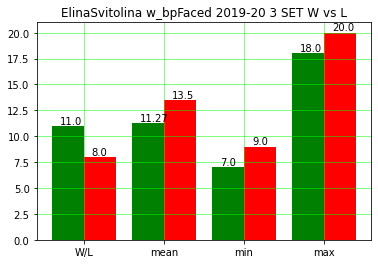

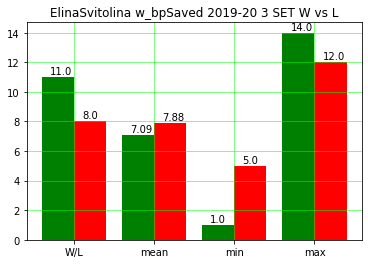

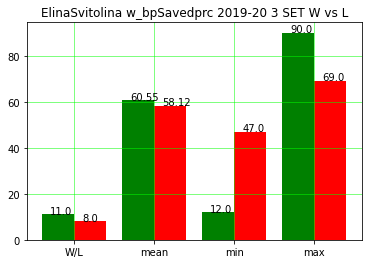

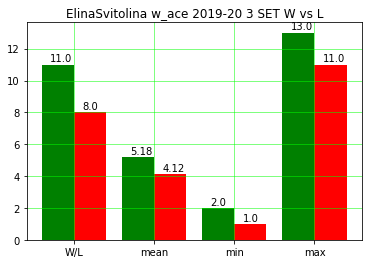

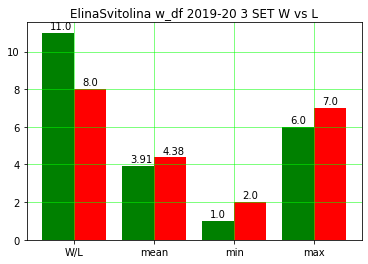

In [119]:
Compare_Plot(p2,P2_past2_S_W3_2D, P2_past2_S_L3_2D, W_describe, L_describe,"2019-20 3 SET",x_axis,w,plt)

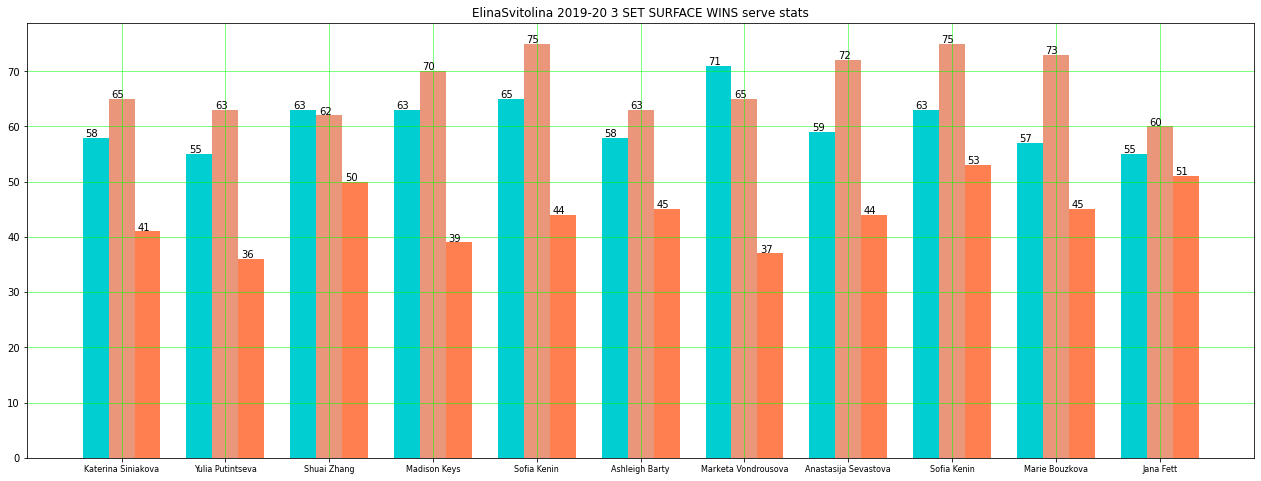

In [120]:

Plot_Serve_stats(P2_past2_S_W3,p2,"2019-20 3 SET SURFACE WINS",serve_winner,plt)

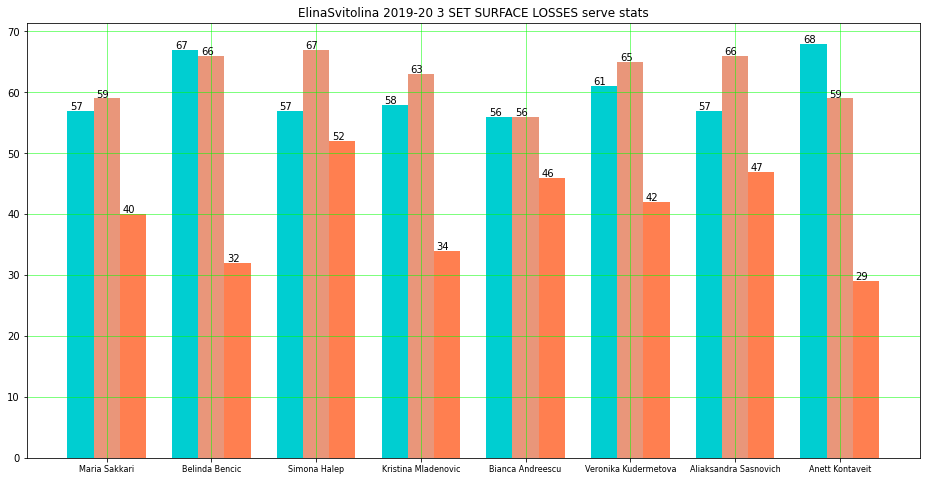

In [121]:

Plot_Serve_stats(P2_past2_S_L3,p2,"2019-20 3 SET SURFACE LOSSES",serve_loser,plt)

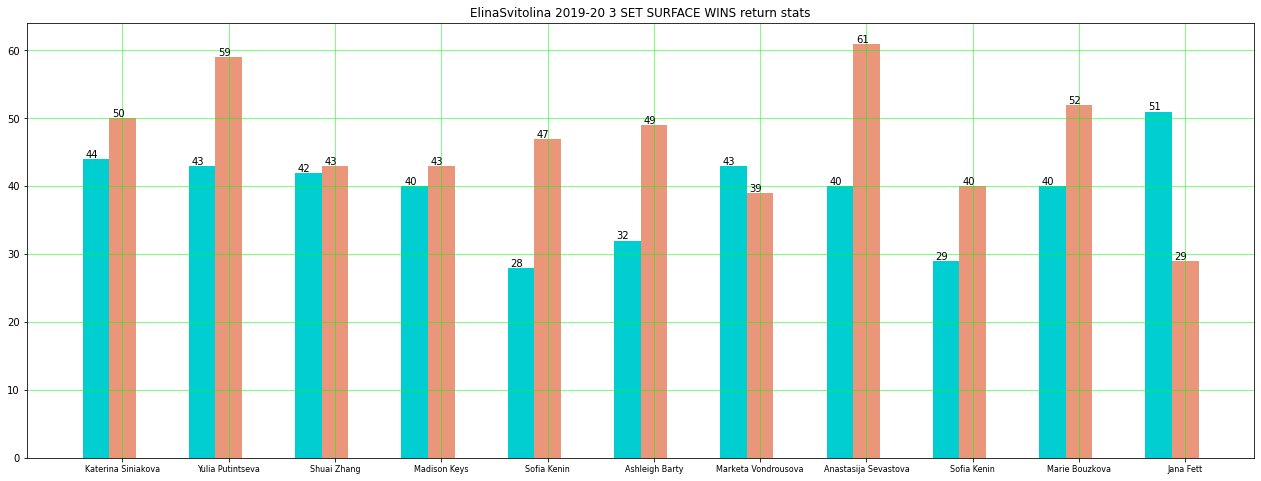

In [122]:
Plot_return_stats(P2_past2_S_W3,p2,"2019-20 3 SET SURFACE WINS",return_winner,plt)

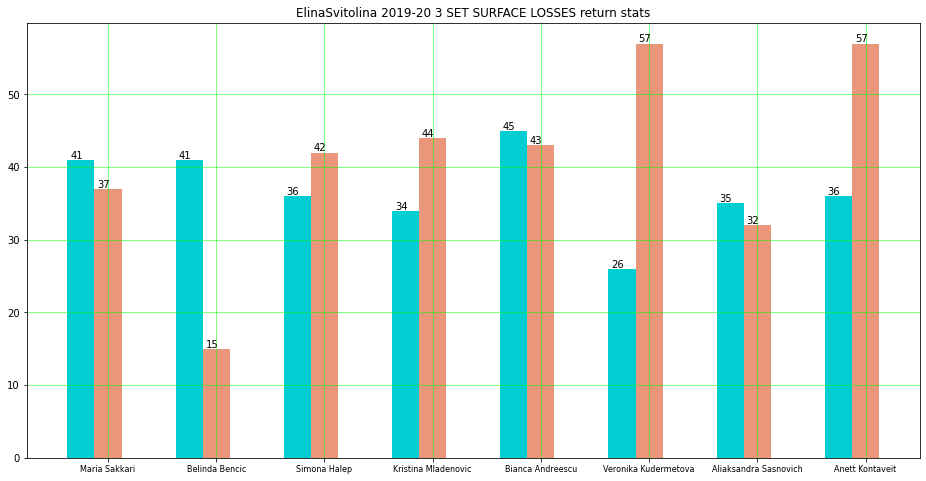

In [123]:

Plot_return_stats(P2_past2_S_L3,p2,"2019-20 3 SET SURFACE LOSSES",return_loser,plt)

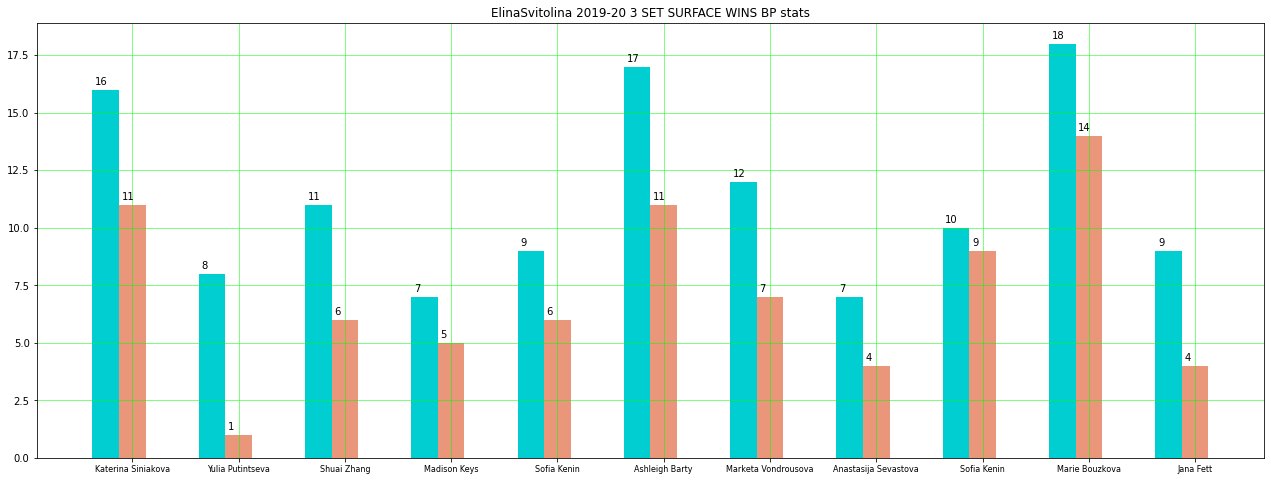

In [124]:
Plot_break_stats(P2_past2_S_W3,p2,"2019-20 3 SET SURFACE WINS",breaks_winner, plt)

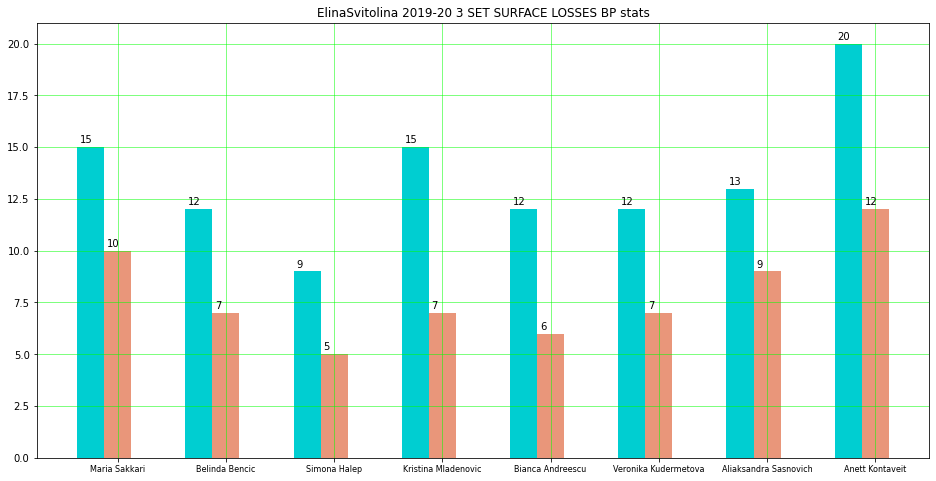

In [125]:

Plot_break_stats(P2_past2_S_L3,p2,"2019-20 3 SET SURFACE LOSSES",breaks_loser, plt)